In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

## CLEAN RAW_DATA_TRAIN

READ EXCEL FILE

In [2]:
df = pd.read_csv('raw_data_train.csv')
df

,Giá nhà,Diện tích (m^2),Khu vực,Mô tả vị trí,Mặt tiền (m),Số phòng ngủ,WC
0,7.4 Tỷ,100,"Phường An Hải Bắc, Quận Sơn Trà",Nhà mặt phố,5,3.0,2.0
1,212.1 Tỷ,4242,"Phường An Hải Tây, Quận Sơn Trà",Căn hộ chung cư,4242,NaN,NaN
2,2500 Tỷ,4242,"Phường An Hải Tây, Quận Sơn Trà",Căn hộ chung cư,4242,NaN,NaN
3,70 Triệu,4242,"Phường An Hải Tây, Quận Sơn Trà",Căn hộ chung cư,4252,NaN,NaN
4,212.1 Tỷ,4242,"Phường An Hải Tây, Quận Sơn Trà",Căn hộ chung cư,4242,11.0,11.0
...,...,...,...,...,...,...,...
1409,4.6 Tỷ,90,", Quận Sơn Trà",Nhà mặt phố,5,2.0,2.0
1410,3.35 Tỷ,60,", Quận Liên Chiểu",Nhà trong ngõ,4,3.0,3.0
1411,3.4 Tỷ,41,", Quận Thanh Khê",Nhà trong ngõ,4,3.0,3.0
1412,3.99 Tỷ,85,", Quận Liên Chiểu",Nhà mặt phố,5,2.0,2.0


CHANGE 'GIÁ NHÀ' TO THE SAME UNIT

In [3]:
def convert_price(price):
    num, unit = price.split()
    num = float(num)
    if unit == 'Triệu':
        return num / 1000
    else:
        return num
df['Giá nhà (Tỷ)'] = df['Giá nhà'].apply(convert_price)
df.drop('Giá nhà', axis=1, inplace=True)
df

,Diện tích (m^2),Khu vực,Mô tả vị trí,Mặt tiền (m),Số phòng ngủ,WC,Giá nhà (Tỷ)
0,100,"Phường An Hải Bắc, Quận Sơn Trà",Nhà mặt phố,5,3.0,2.0,7.40
1,4242,"Phường An Hải Tây, Quận Sơn Trà",Căn hộ chung cư,4242,NaN,NaN,212.10
2,4242,"Phường An Hải Tây, Quận Sơn Trà",Căn hộ chung cư,4242,NaN,NaN,2500.00
3,4242,"Phường An Hải Tây, Quận Sơn Trà",Căn hộ chung cư,4252,NaN,NaN,0.07
4,4242,"Phường An Hải Tây, Quận Sơn Trà",Căn hộ chung cư,4242,11.0,11.0,212.10
...,...,...,...,...,...,...,...
1409,90,", Quận Sơn Trà",Nhà mặt phố,5,2.0,2.0,4.60
1410,60,", Quận Liên Chiểu",Nhà trong ngõ,4,3.0,3.0,3.35
1411,41,", Quận Thanh Khê",Nhà trong ngõ,4,3.0,3.0,3.40
1412,85,", Quận Liên Chiểu",Nhà mặt phố,5,2.0,2.0,3.99


CLEAN DATA

FILTER DATA


In [4]:
df.loc[:, 'Khu vực'] = df['Khu vực'].str.split(',').str[1].str.strip() # Take only 'Quận'

In [5]:
df['Khu vực'].value_counts()

Khu vực
Quận Ngũ Hành Sơn    387
Quận Hải Châu        327
Quận Thanh Khê       202
Quận Liên Chiểu      188
Quận Cẩm Lệ          152
Quận Sơn Trà         143
Huyện Hòa Vang        15
Name: count, dtype: int64

DELETE DUPLICATED DATA

In [6]:
df_no_duplicate = df.drop_duplicates()
df_no_duplicate

,Diện tích (m^2),Khu vực,Mô tả vị trí,Mặt tiền (m),Số phòng ngủ,WC,Giá nhà (Tỷ)
0,100,Quận Sơn Trà,Nhà mặt phố,5,3.0,2.0,7.40
1,4242,Quận Sơn Trà,Căn hộ chung cư,4242,NaN,NaN,212.10
2,4242,Quận Sơn Trà,Căn hộ chung cư,4242,NaN,NaN,2500.00
3,4242,Quận Sơn Trà,Căn hộ chung cư,4252,NaN,NaN,0.07
4,4242,Quận Sơn Trà,Căn hộ chung cư,4242,11.0,11.0,212.10
...,...,...,...,...,...,...,...
1408,52,Quận Ngũ Hành Sơn,Nhà mặt phố,5,2.0,2.0,3.15
1409,90,Quận Sơn Trà,Nhà mặt phố,5,2.0,2.0,4.60
1410,60,Quận Liên Chiểu,Nhà trong ngõ,4,3.0,3.0,3.35
1412,85,Quận Liên Chiểu,Nhà mặt phố,5,2.0,2.0,3.99


UPPER ALL DATAS IN 'Mô tả vị trí'


In [7]:
df_no_duplicate['Mô tả vị trí'].value_counts()

Mô tả vị trí
Nhà mặt phố              543
Nhà trong ngõ            214
Nhà đất thổ cư           209
Căn hộ chung cư          179
Nhà biệt thự, liền kề    141
Nhà biệt thự, Liền kề     22
Condotel                   4
Name: count, dtype: int64

In [8]:
df_no_duplicate.loc[:, 'Mô tả vị trí'] = df_no_duplicate['Mô tả vị trí'].str.upper() #Upper all string in 'Mô tả vị trí
df_no_duplicate['Mô tả vị trí'].value_counts()

Mô tả vị trí
NHÀ MẶT PHỐ              543
NHÀ TRONG NGÕ            214
NHÀ ĐẤT THỔ CƯ           209
CĂN HỘ CHUNG CƯ          179
NHÀ BIỆT THỰ, LIỀN KỀ    163
CONDOTEL                   4
Name: count, dtype: int64

CHECK NULL VALUE IN EACH COLUMN

In [9]:
#Check null value in each colum
df_no_duplicate.isna().sum()

Diện tích (m^2)      0
Khu vực              0
Mô tả vị trí         0
Mặt tiền (m)         0
Số phòng ngủ       144
WC                 213
Giá nhà (Tỷ)         0
dtype: int64

FILL NULL VALUE WITH COLUMN'S MEDIAN

In [10]:
df_no_null = df_no_duplicate.copy()
df_no_null['Số phòng ngủ'] = df_no_duplicate['Số phòng ngủ'].fillna(int(df['Số phòng ngủ'].median()))
df_no_null['WC'] = df_no_duplicate['WC'].fillna(int(df['WC'].median()))
df_no_null.isnull().sum()
df_no_null

,Diện tích (m^2),Khu vực,Mô tả vị trí,Mặt tiền (m),Số phòng ngủ,WC,Giá nhà (Tỷ)
0,100,Quận Sơn Trà,NHÀ MẶT PHỐ,5,3.0,2.0,7.40
1,4242,Quận Sơn Trà,CĂN HỘ CHUNG CƯ,4242,3.0,3.0,212.10
2,4242,Quận Sơn Trà,CĂN HỘ CHUNG CƯ,4242,3.0,3.0,2500.00
3,4242,Quận Sơn Trà,CĂN HỘ CHUNG CƯ,4252,3.0,3.0,0.07
4,4242,Quận Sơn Trà,CĂN HỘ CHUNG CƯ,4242,11.0,11.0,212.10
...,...,...,...,...,...,...,...
1408,52,Quận Ngũ Hành Sơn,NHÀ MẶT PHỐ,5,2.0,2.0,3.15
1409,90,Quận Sơn Trà,NHÀ MẶT PHỐ,5,2.0,2.0,4.60
1410,60,Quận Liên Chiểu,NHÀ TRONG NGÕ,4,3.0,3.0,3.35
1412,85,Quận Liên Chiểu,NHÀ MẶT PHỐ,5,2.0,2.0,3.99


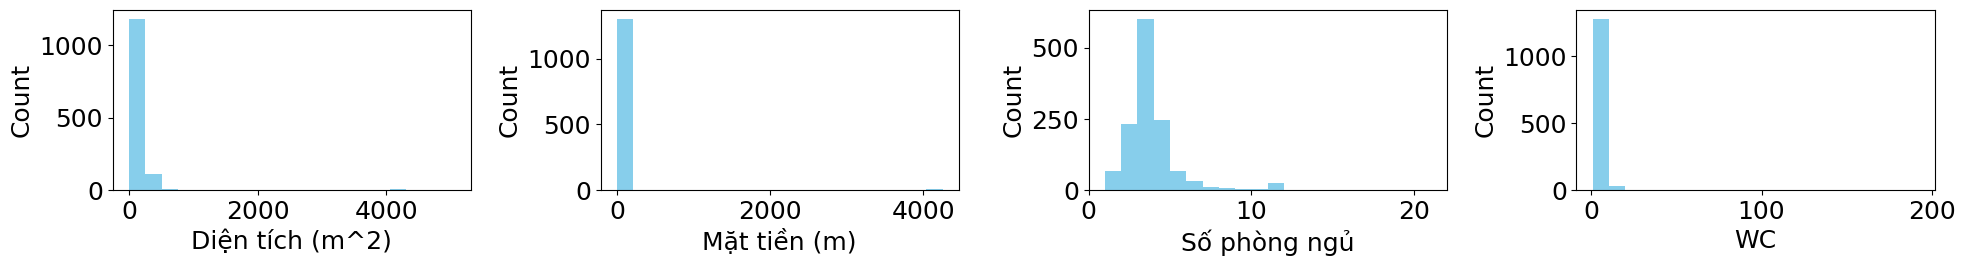

In [11]:
deal_colums = ['Diện tích (m^2)', 'Mặt tiền (m)', 'Số phòng ngủ', 'WC']
plt.figure(figsize=(20, 3))
j=1
for col in deal_colums:
        plt.subplot(1, len(deal_colums), j)
        plt.hist(df_no_null[col], bins=20, color='skyblue')
        plt.xlabel(col)
        plt.ylabel("Count")
        j+=1
plt.tight_layout()
plt.show()

GET RID OF OUTLIERS USING IQR

In [12]:
numeric_cols = df.select_dtypes(include='number').columns # get all features whose data is numeric

In [13]:
Q1 = df_no_null['Giá nhà (Tỷ)'].quantile(0.25) # calculate 1st quantile
Q3 = df_no_null['Giá nhà (Tỷ)'].quantile(0.75) # calculate 3rd quantile
IQR = Q3 - Q1 # calculate IQR
# Find lower_limit and upper_limit
lower_limit = Q1 - 3 * IQR
upper_limit = Q3 + 3 * IQR

# Filter out rows with 'Giá nhà (Tỷ)' values outside the lower_limit and upper_limit
filtered_df = df_no_null[(df_no_null['Giá nhà (Tỷ)'] >= lower_limit) & (df_no_null['Giá nhà (Tỷ)'] <= upper_limit)]
# This will create a new DataFrame 'filtered_df' that contains only the rows where 'Giá nhà (Tỷ)' values are within the defined limits.
filtered_df


,Diện tích (m^2),Khu vực,Mô tả vị trí,Mặt tiền (m),Số phòng ngủ,WC,Giá nhà (Tỷ)
0,100,Quận Sơn Trà,NHÀ MẶT PHỐ,5,3.0,2.0,7.40
3,4242,Quận Sơn Trà,CĂN HỘ CHUNG CƯ,4252,3.0,3.0,0.07
5,4242,Quận Sơn Trà,CĂN HỘ CHUNG CƯ,4242,11.0,11.0,0.07
7,100,Quận Liên Chiểu,NHÀ ĐẤT THỔ CƯ,5,4.0,4.0,5.80
8,81,Quận Thanh Khê,NHÀ ĐẤT THỔ CƯ,5,3.0,2.0,5.90
...,...,...,...,...,...,...,...
1408,52,Quận Ngũ Hành Sơn,NHÀ MẶT PHỐ,5,2.0,2.0,3.15
1409,90,Quận Sơn Trà,NHÀ MẶT PHỐ,5,2.0,2.0,4.60
1410,60,Quận Liên Chiểu,NHÀ TRONG NGÕ,4,3.0,3.0,3.35
1412,85,Quận Liên Chiểu,NHÀ MẶT PHỐ,5,2.0,2.0,3.99


In [14]:
def change_outliers(data):
    for col in deal_colums:
        Q1 = data[col].quantile(0.25) # calculate 1st quantile
        Q3 = data[col].quantile(0.75) # calculate 3rd quantile
        IQR = Q3 - Q1 # calculate IQR
        # Find lower_limit and upper_limit
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        # Replace data out of limit with limit value
        data.loc[data[col] > upper_limit, col] = upper_limit 
        data.loc[data[col] < lower_limit, col] = lower_limit
    return data
df_no_outliers = change_outliers(filtered_df)

HISTOGRAMS OF DATA BEFORE AND AFTER CLEANING

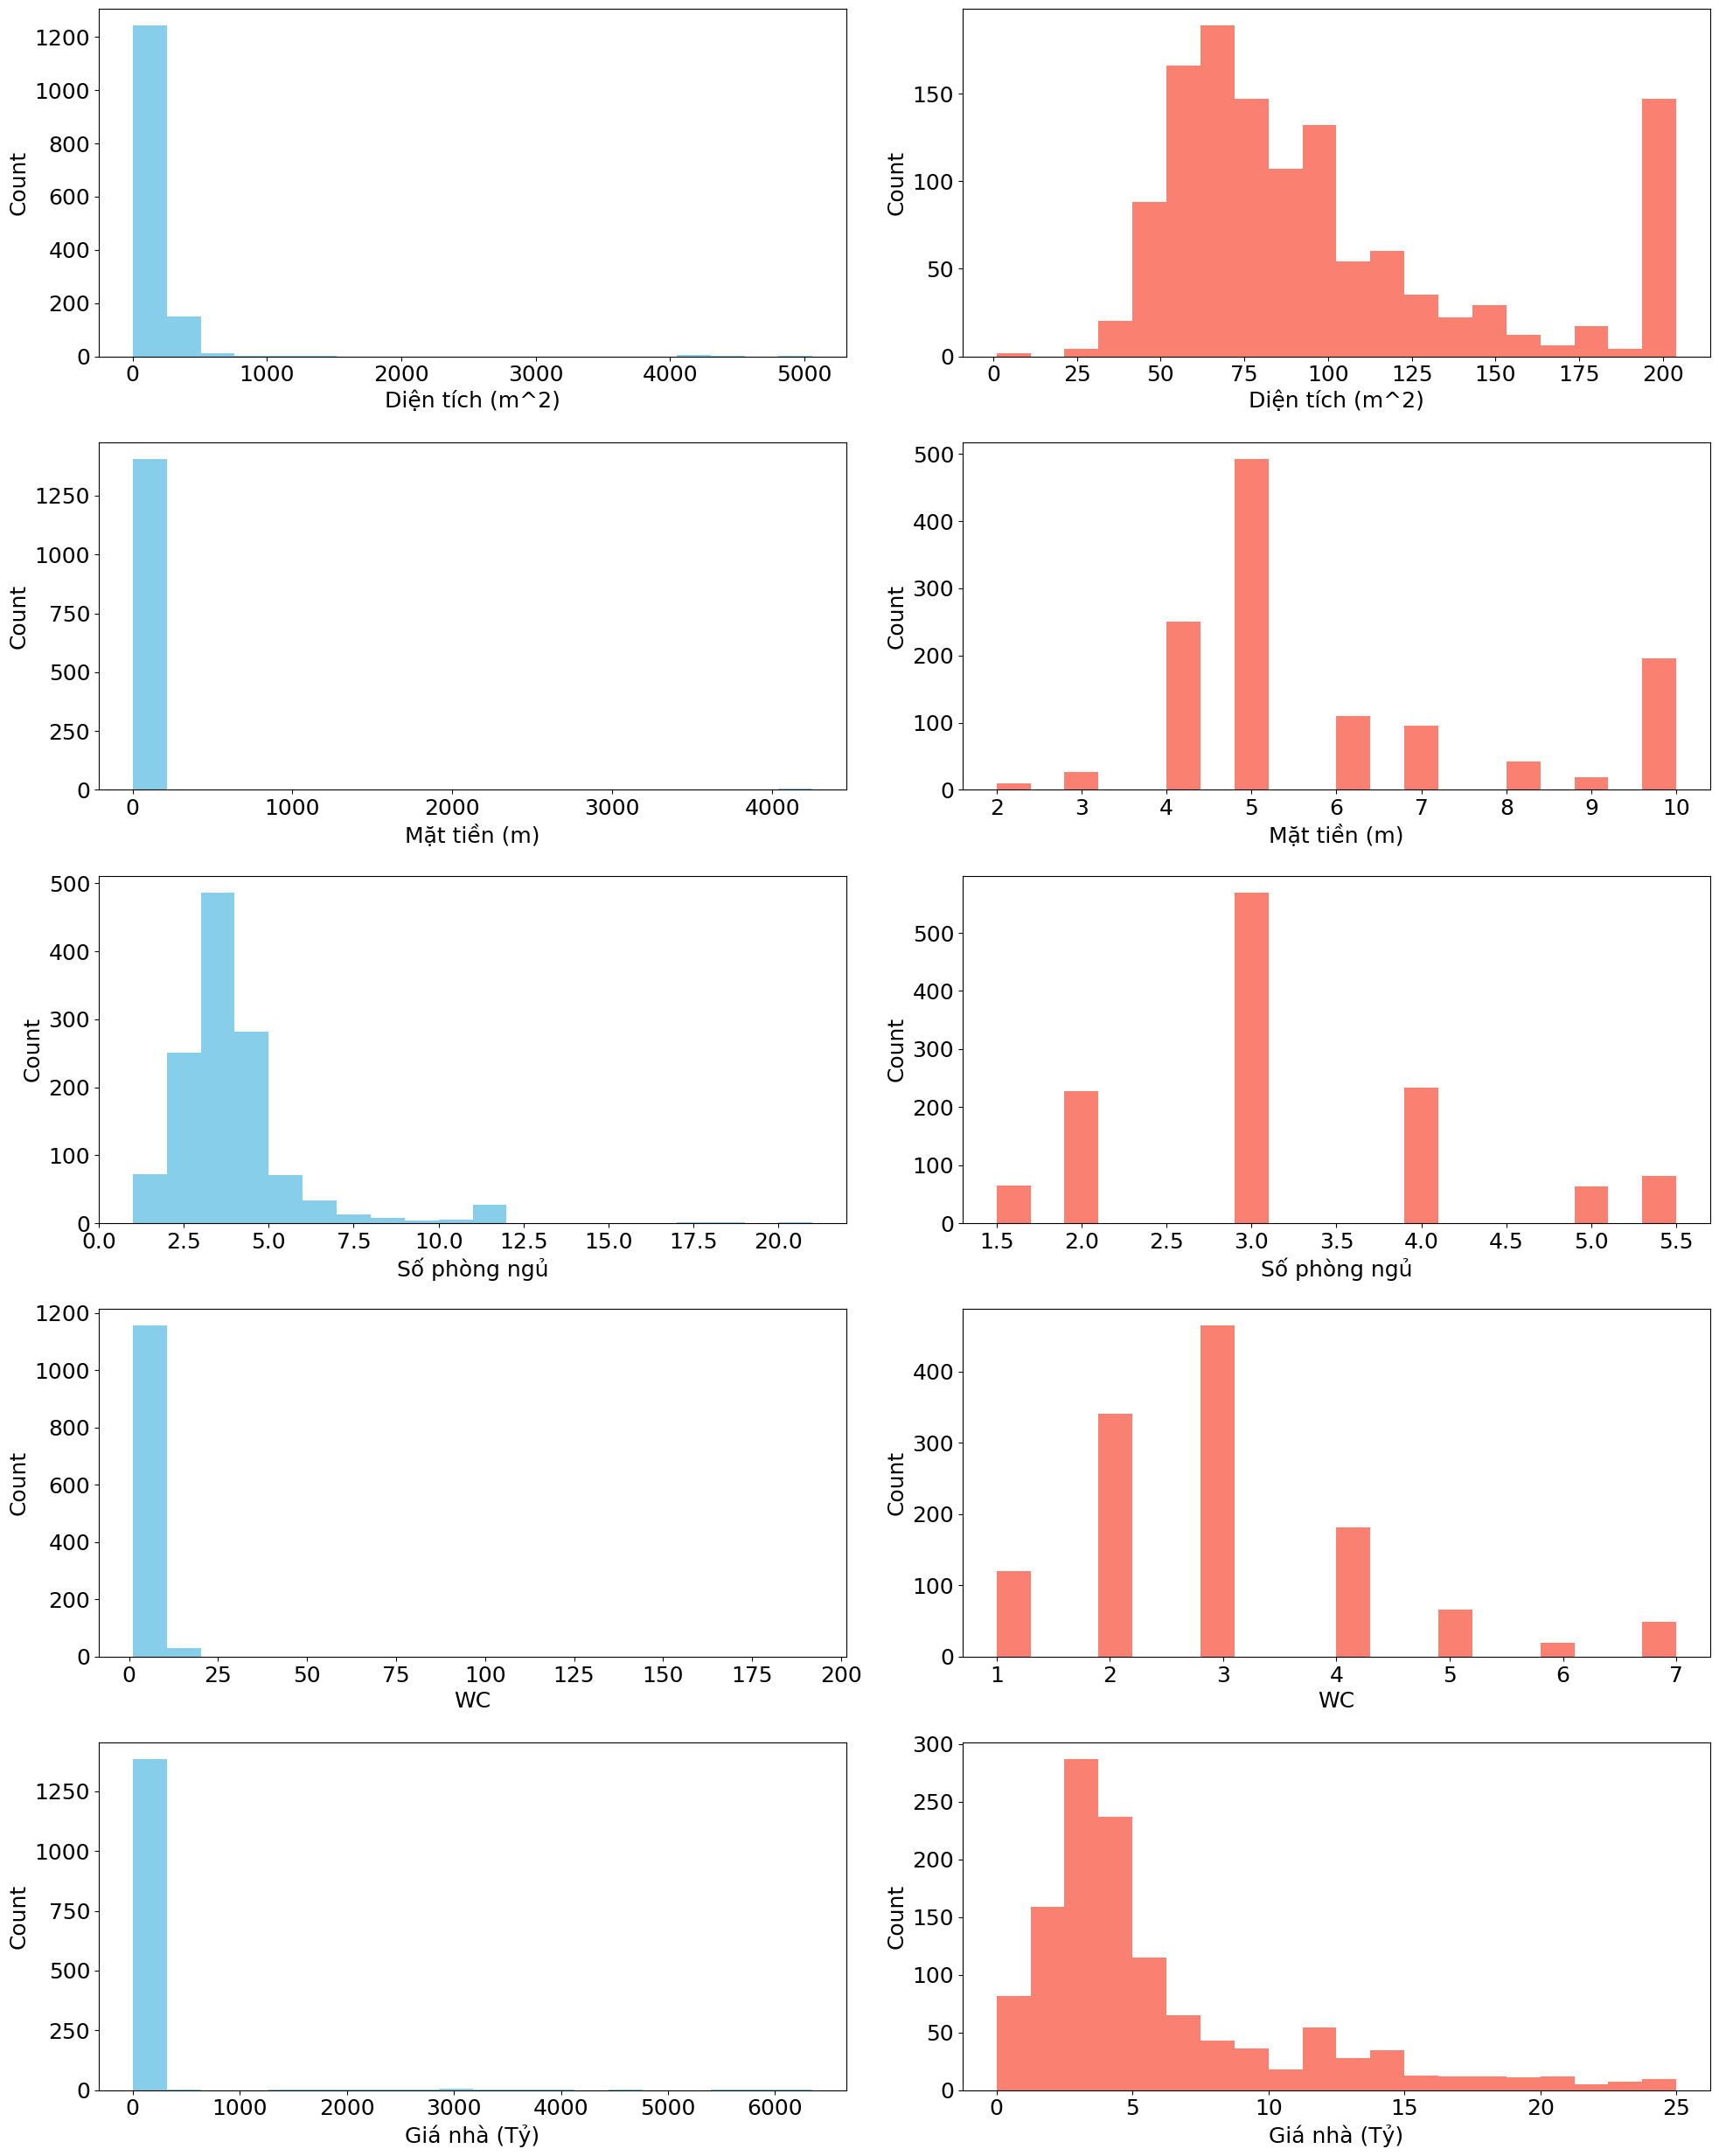

In [15]:
def histogram(df_before, df_after):
    plt.figure(figsize=(20, 25))
    j = 1
    for col in numeric_cols:
        plt.subplot(len(numeric_cols), 2, j)
        plt.hist(df_before[col], bins=20, color='skyblue')
        plt.xlabel(col)
        plt.ylabel("Count")

        plt.subplot(len(numeric_cols), 2, j+1)
        plt.hist(df_after[col], bins=20, color='salmon')
        plt.xlabel(col)
        plt.ylabel("Count")

        j += 2
    plt.tight_layout()
    plt.show()
histogram(df, df_no_outliers)

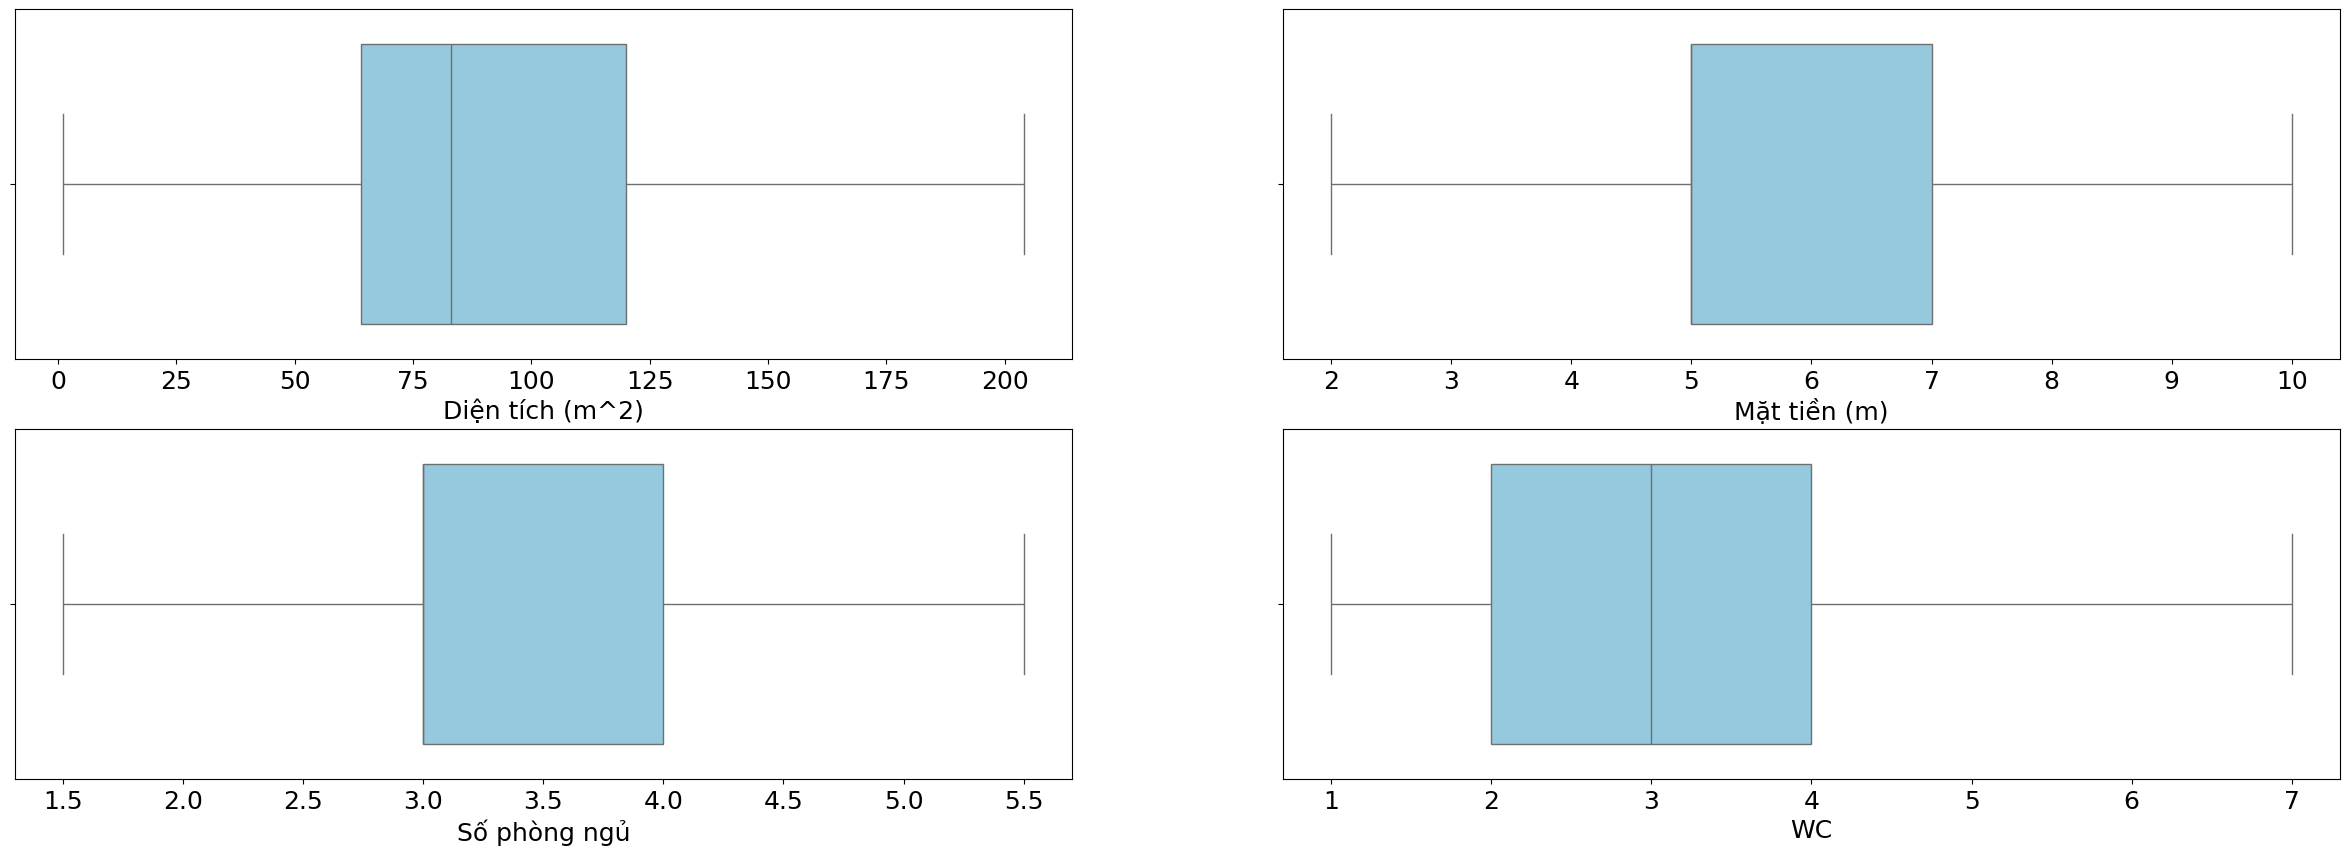

In [16]:
plt.figure(figsize=(30, 10))
j=1
for col in deal_colums:
    plt.subplot(2, 2, j)
    sns.boxplot(data=df_no_outliers, x=col, color='skyblue')
    plt.xlabel(col)
    j+=1
plt.show()

NORMALIZATION

In [17]:
df_to_norm = df_no_outliers[numeric_cols]

MIN-MAX NORMALIZATION

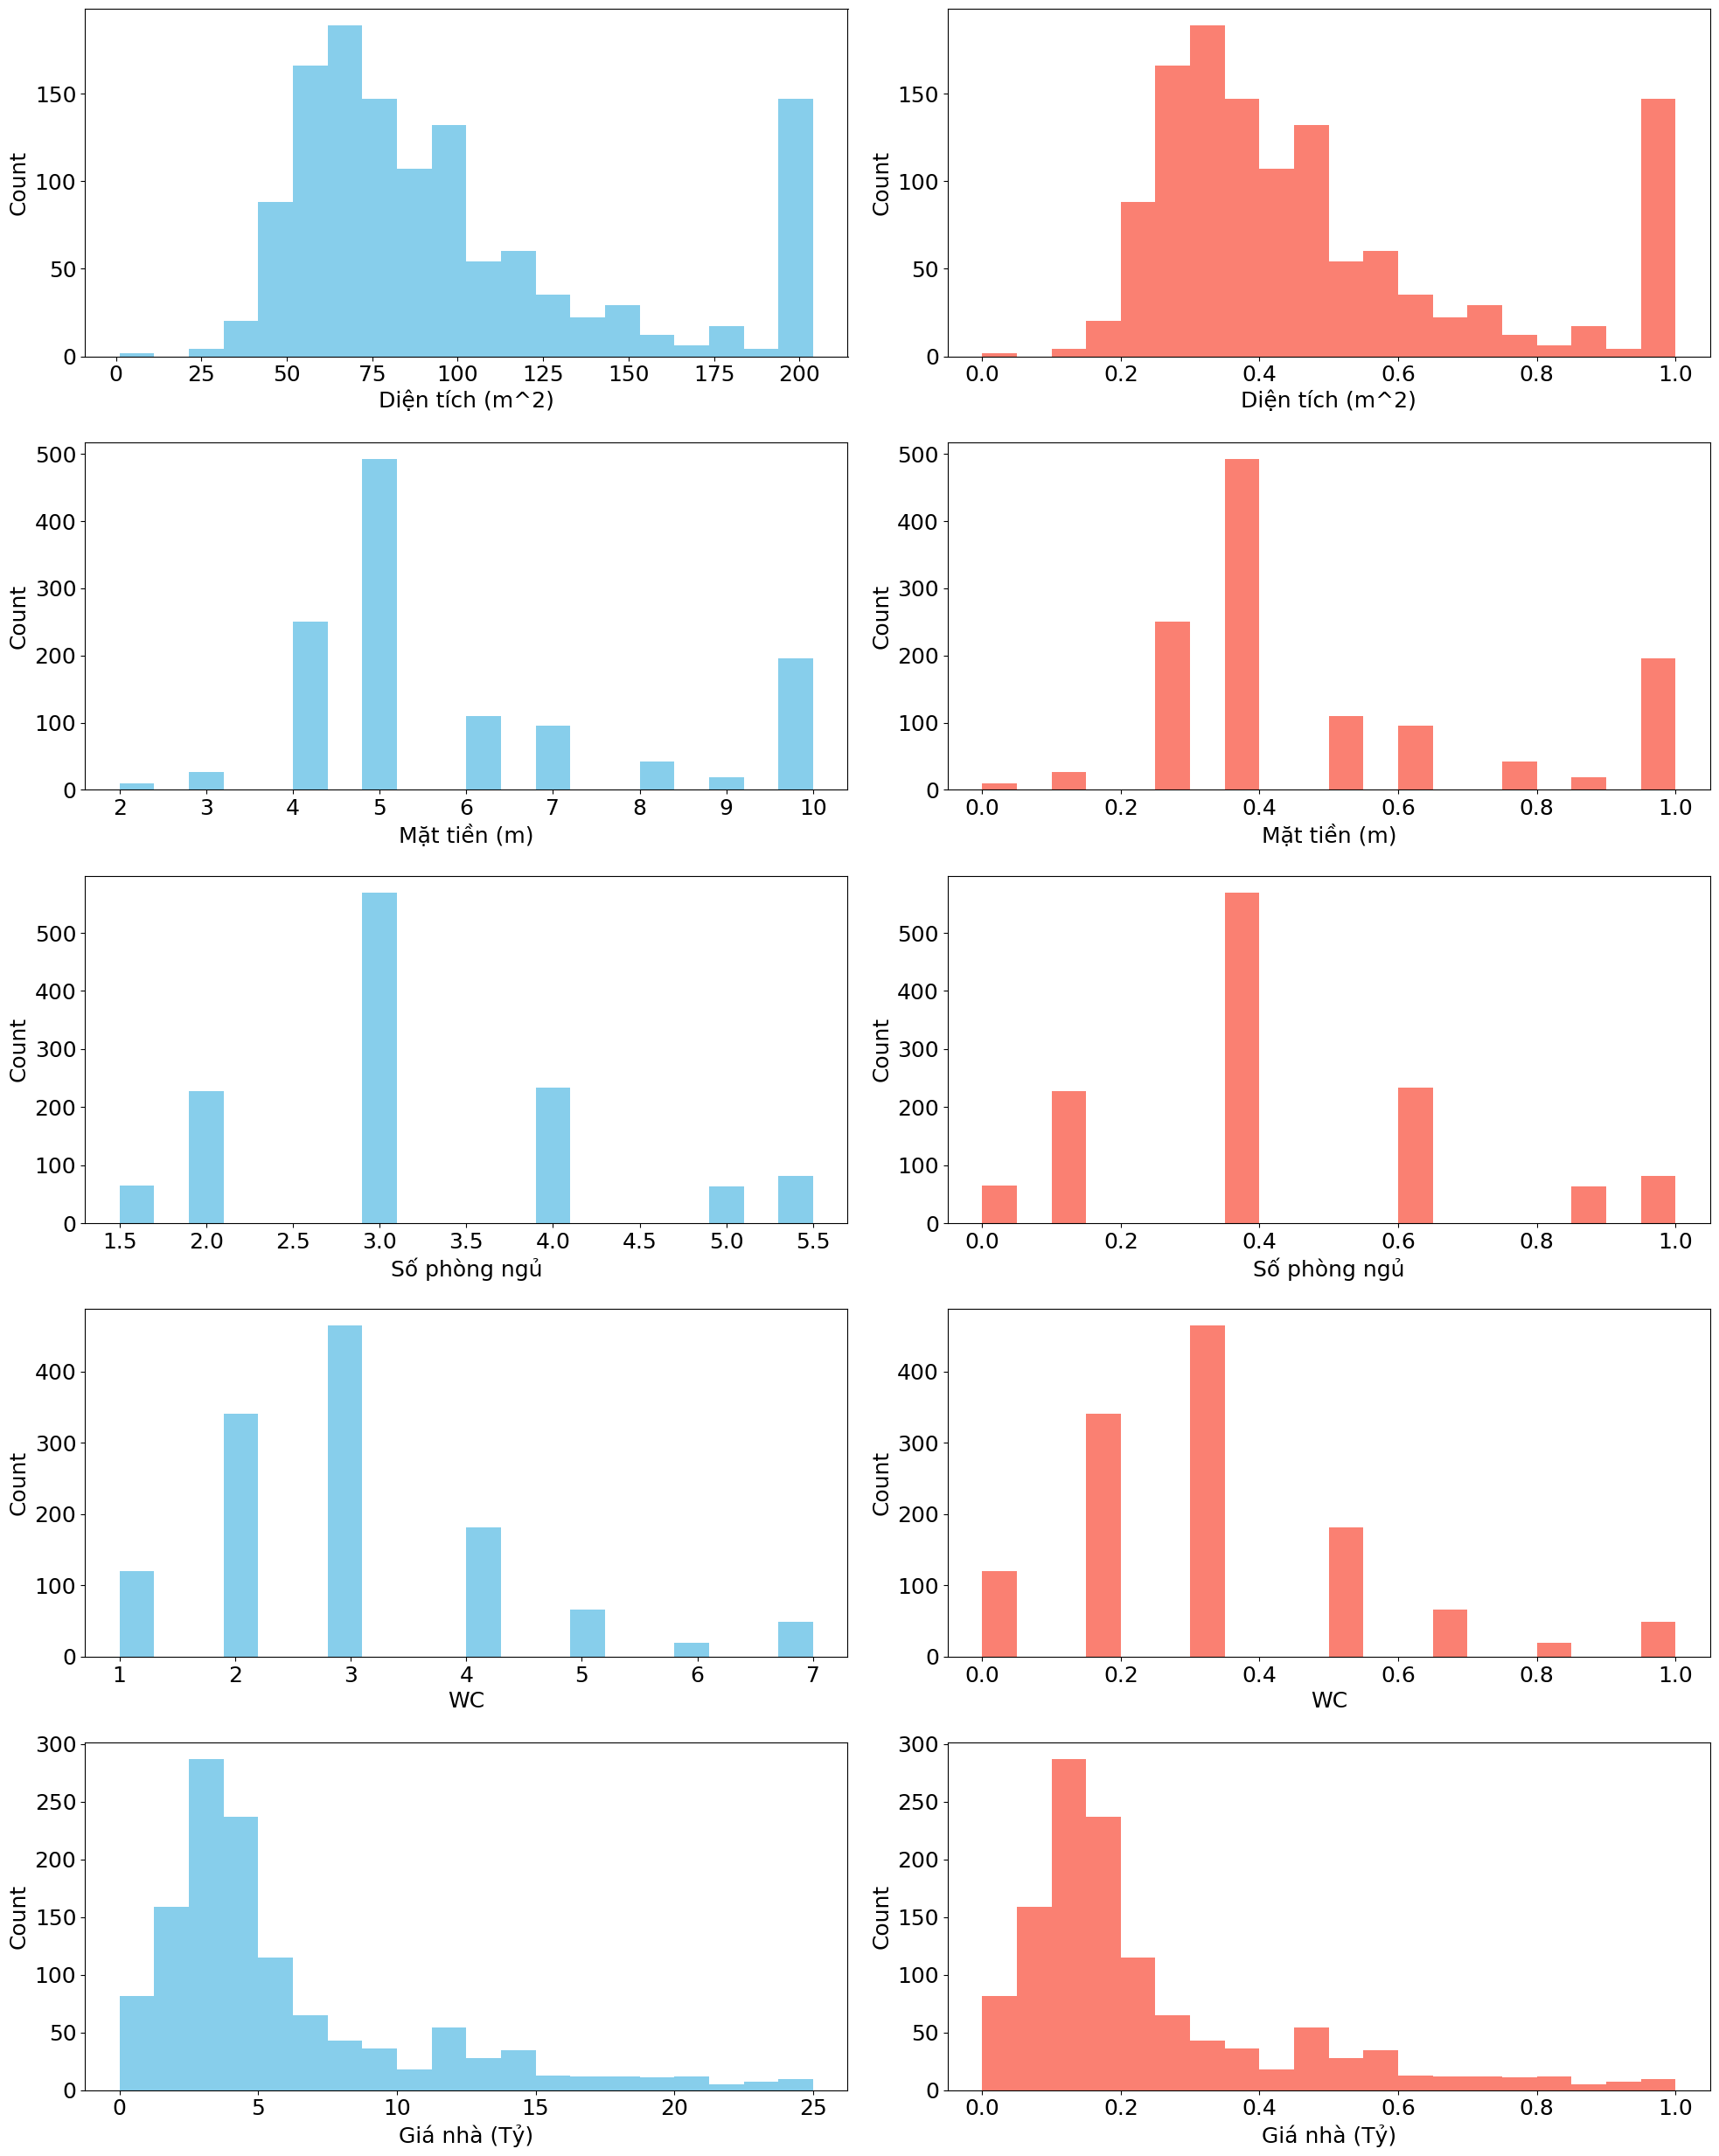

In [18]:
min_max = MinMaxScaler()
df_minmax = pd.DataFrame(min_max.fit_transform(df_to_norm), columns=df_to_norm.columns)
histogram(df_no_outliers, df_minmax)

POWERTRANSFORMER NORMALIZATION

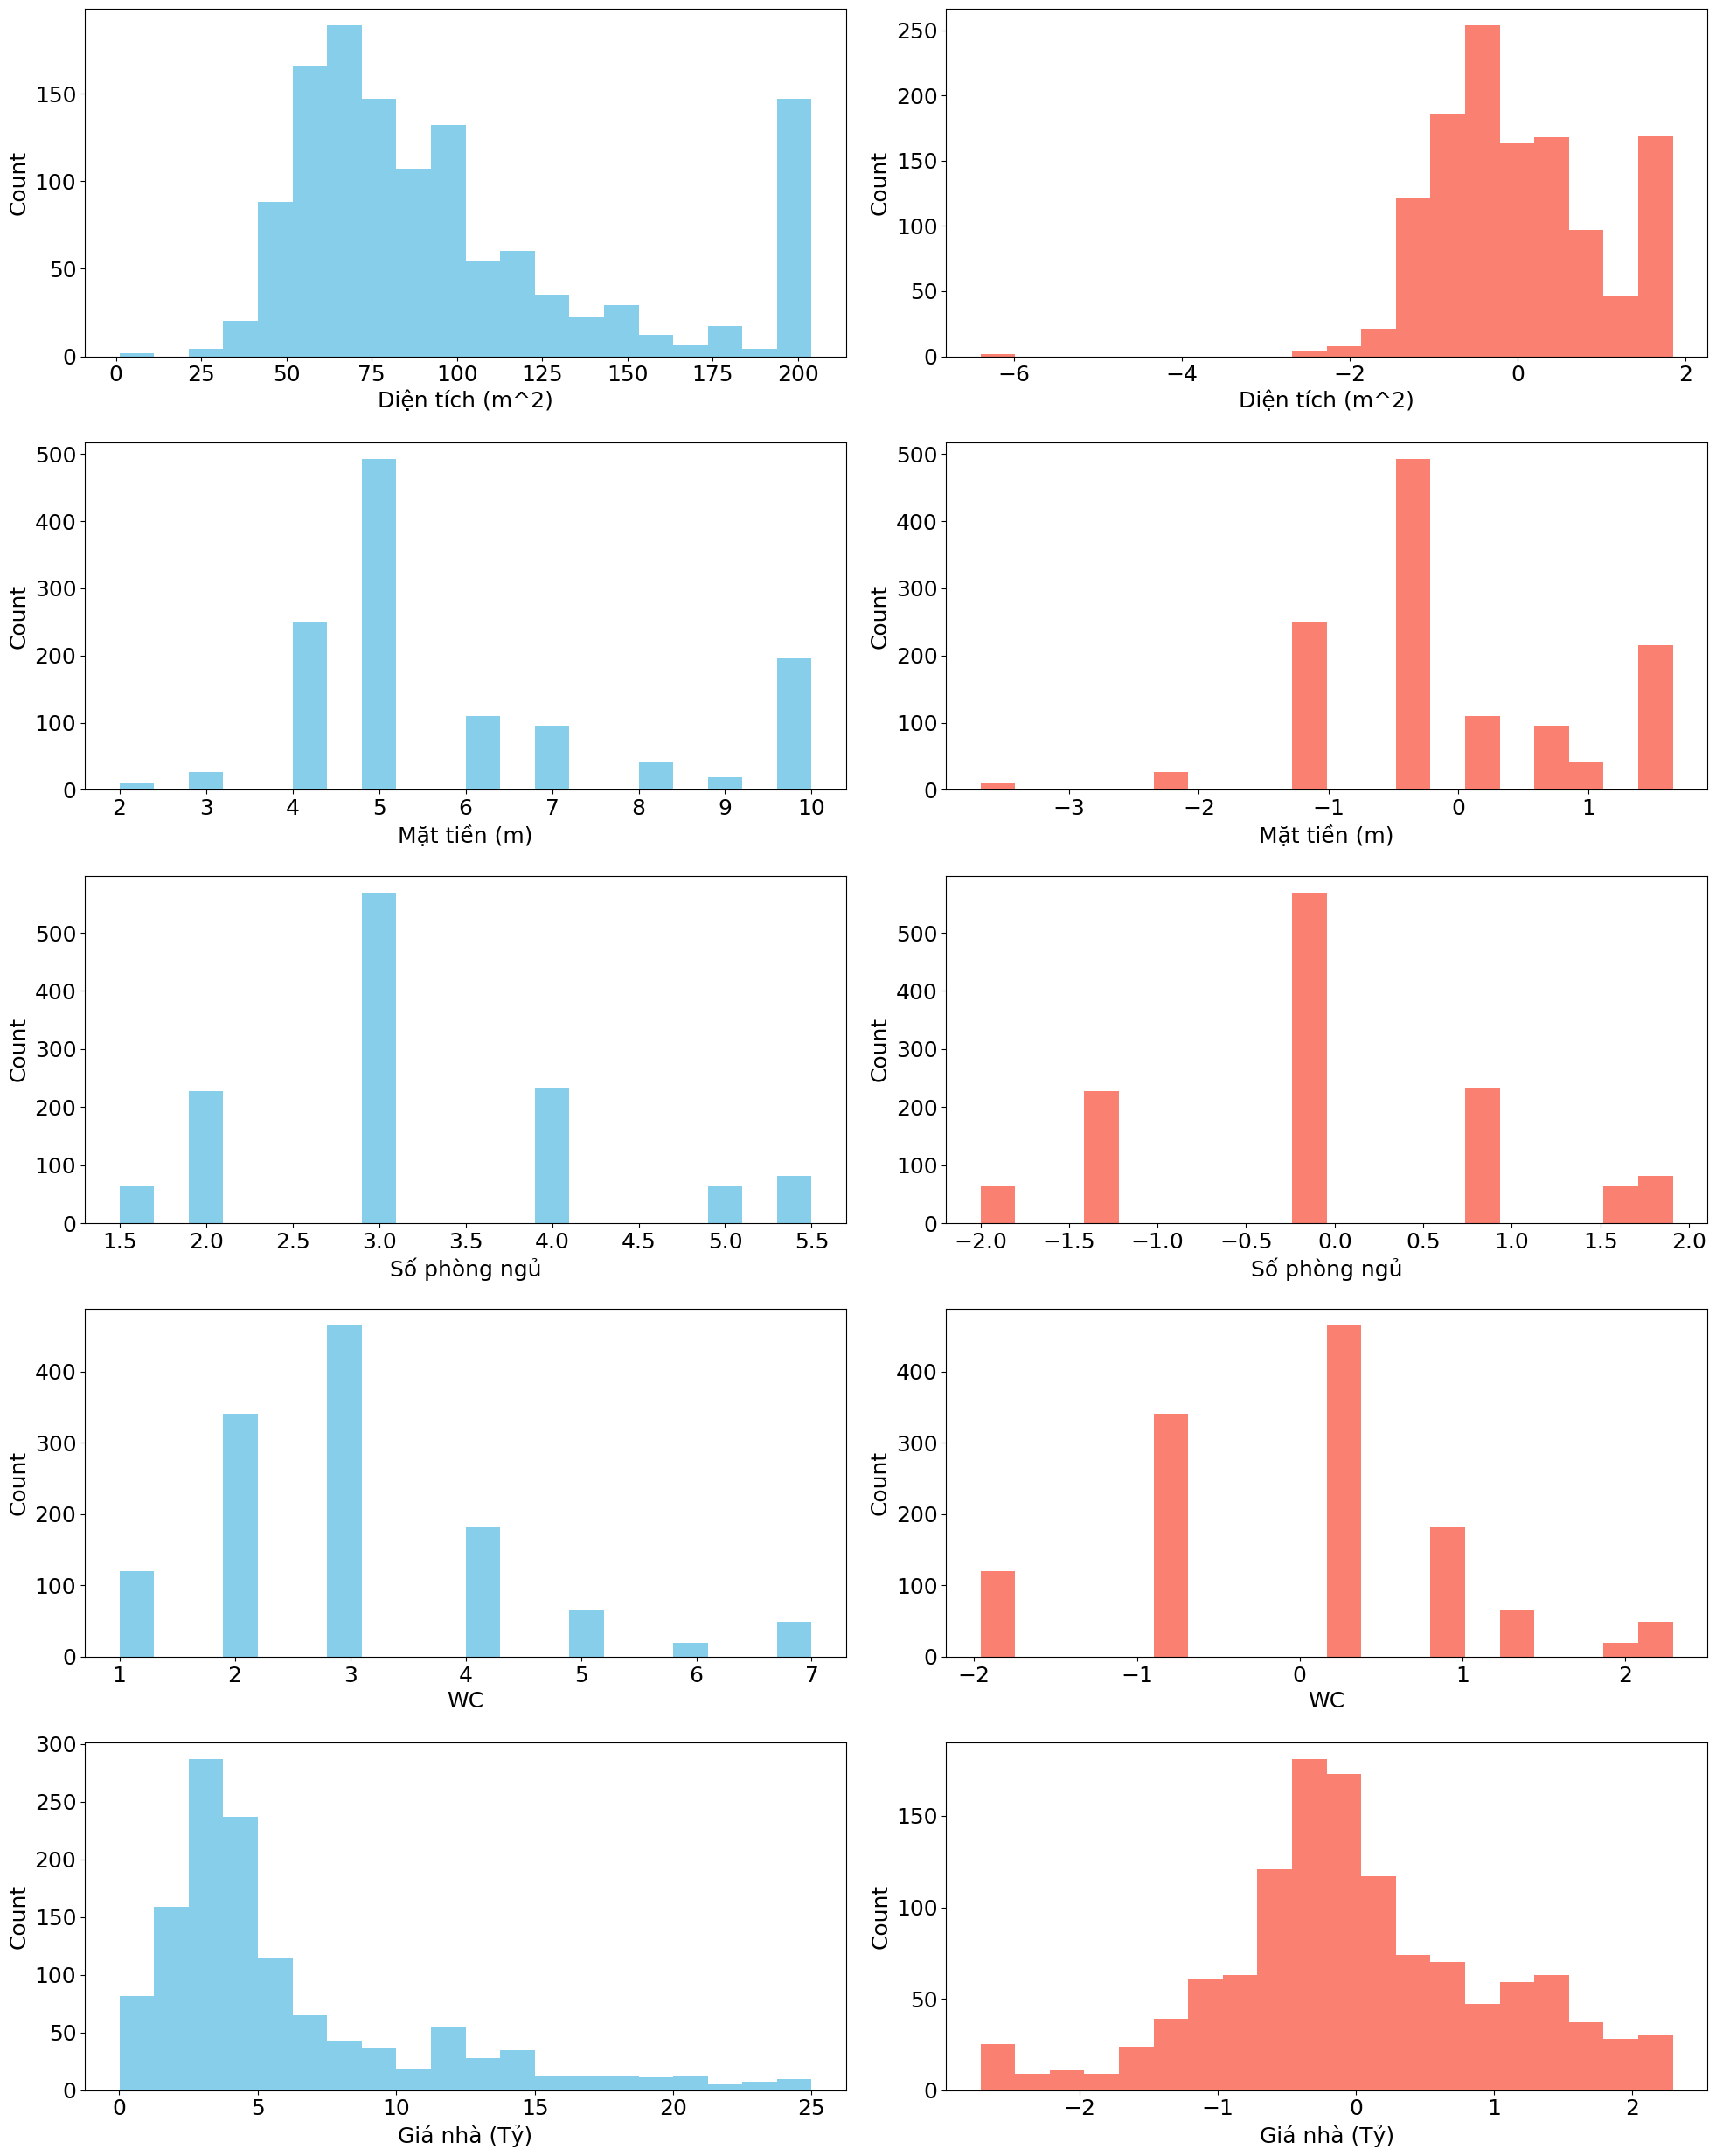

In [19]:
power = PowerTransformer()
df_power = pd.DataFrame(power.fit_transform(df_to_norm), columns=df_to_norm.columns)
histogram(df_no_outliers, df_power)

In [20]:
df_no_outliers.to_csv("clean_data_train.csv", index=False)

## CLEAN RAW_DATA_TEST

READ EXCEL FILE

In [21]:
df = pd.read_csv('raw_data_test.csv')
df

,Giá nhà,Diện tích (m^2),Khu vực,Mô tả vị trí,Mặt tiền (m),Số phòng ngủ,WC
0,2.2 Tỷ,46,"Phường Nại Hiên Đông, Quận Sơn Trà",Căn hộ chung cư,15,1.0,1.0
1,13.42 Tỷ,433,"Phường Hòa Hải, Quận Ngũ Hành Sơn","Nhà biệt thự, liền kề",15,4.0,4.0
2,4.3 Tỷ,100,"Phường Hòa Quý, Quận Ngũ Hành Sơn",Nhà đất thổ cư,5,3.0,NaN
3,9.9 Tỷ,64,"Phường Hòa Thuận Tây, Quận Hải Châu",Nhà mặt phố,6,3.0,3.0
4,12.9 Tỷ,180,", Quận Sơn Trà","Nhà biệt thự, liền kề",10,4.0,4.0
...,...,...,...,...,...,...,...
215,18 Tỷ,140,"Phường An Hải Tây, Quận Sơn Trà",Nhà mặt phố,5,8.0,10.0
216,22 Tỷ,250,"Phường An Hải Tây, Quận Sơn Trà","Nhà biệt thự, liền kề",10,4.0,6.0
217,5 Tỷ,87,"Phường Nại Hiên Đông, Quận Sơn Trà",Nhà mặt phố,4,4.0,2.0
218,6 Tỷ,140,"Phường Hòa Thuận Tây, Quận Hải Châu",Nhà mặt phố,6,5.0,5.0


CHANGE 'GIÁ NHÀ' TO THE SAME UNIT

In [22]:
def convert_price(price):
    num, unit = price.split()
    num = float(num)
    if unit == 'Triệu':
        return num / 1000
    else:
        return num
df['Giá nhà (Tỷ)'] = df['Giá nhà'].apply(convert_price)
df.drop('Giá nhà', axis=1, inplace=True)
df

,Diện tích (m^2),Khu vực,Mô tả vị trí,Mặt tiền (m),Số phòng ngủ,WC,Giá nhà (Tỷ)
0,46,"Phường Nại Hiên Đông, Quận Sơn Trà",Căn hộ chung cư,15,1.0,1.0,2.20
1,433,"Phường Hòa Hải, Quận Ngũ Hành Sơn","Nhà biệt thự, liền kề",15,4.0,4.0,13.42
2,100,"Phường Hòa Quý, Quận Ngũ Hành Sơn",Nhà đất thổ cư,5,3.0,NaN,4.30
3,64,"Phường Hòa Thuận Tây, Quận Hải Châu",Nhà mặt phố,6,3.0,3.0,9.90
4,180,", Quận Sơn Trà","Nhà biệt thự, liền kề",10,4.0,4.0,12.90
...,...,...,...,...,...,...,...
215,140,"Phường An Hải Tây, Quận Sơn Trà",Nhà mặt phố,5,8.0,10.0,18.00
216,250,"Phường An Hải Tây, Quận Sơn Trà","Nhà biệt thự, liền kề",10,4.0,6.0,22.00
217,87,"Phường Nại Hiên Đông, Quận Sơn Trà",Nhà mặt phố,4,4.0,2.0,5.00
218,140,"Phường Hòa Thuận Tây, Quận Hải Châu",Nhà mặt phố,6,5.0,5.0,6.00


CLEAN DATA

FILTER DATA


In [23]:
df.loc[:, 'Khu vực'] = df['Khu vực'].str.split(',').str[1].str.strip() # Take only 'Quận'

In [24]:
df['Khu vực'].value_counts()

Khu vực
Quận Sơn Trà         53
Quận Hải Châu        51
Quận Thanh Khê       35
Quận Ngũ Hành Sơn    32
Quận Liên Chiểu      26
Quận Cẩm Lệ          21
Huyện Hòa Vang        2
Name: count, dtype: int64

DELETE DUPLICATED DATA

In [25]:
df_no_duplicate = df.drop_duplicates()
df_no_duplicate

,Diện tích (m^2),Khu vực,Mô tả vị trí,Mặt tiền (m),Số phòng ngủ,WC,Giá nhà (Tỷ)
0,46,Quận Sơn Trà,Căn hộ chung cư,15,1.0,1.0,2.20
1,433,Quận Ngũ Hành Sơn,"Nhà biệt thự, liền kề",15,4.0,4.0,13.42
2,100,Quận Ngũ Hành Sơn,Nhà đất thổ cư,5,3.0,NaN,4.30
3,64,Quận Hải Châu,Nhà mặt phố,6,3.0,3.0,9.90
4,180,Quận Sơn Trà,"Nhà biệt thự, liền kề",10,4.0,4.0,12.90
...,...,...,...,...,...,...,...
215,140,Quận Sơn Trà,Nhà mặt phố,5,8.0,10.0,18.00
216,250,Quận Sơn Trà,"Nhà biệt thự, liền kề",10,4.0,6.0,22.00
217,87,Quận Sơn Trà,Nhà mặt phố,4,4.0,2.0,5.00
218,140,Quận Hải Châu,Nhà mặt phố,6,5.0,5.0,6.00


UPPER ALL DATAS IN 'Mô tả vị trí'


In [26]:
df_no_duplicate['Mô tả vị trí'].value_counts()

Mô tả vị trí
Nhà mặt phố              125
Nhà đất thổ cư            29
Căn hộ chung cư           24
Nhà biệt thự, liền kề     24
Nhà trong ngõ             13
Name: count, dtype: int64

In [27]:
df_no_duplicate.loc[:, 'Mô tả vị trí'] = df_no_duplicate['Mô tả vị trí'].str.upper() #Upper all string in 'Mô tả vị trí
df_no_duplicate['Mô tả vị trí'].value_counts()

Mô tả vị trí
NHÀ MẶT PHỐ              125
NHÀ ĐẤT THỔ CƯ            29
CĂN HỘ CHUNG CƯ           24
NHÀ BIỆT THỰ, LIỀN KỀ     24
NHÀ TRONG NGÕ             13
Name: count, dtype: int64

CHECK NULL VALUE IN EACH COLUMN

In [28]:
#Check null value in each colum
df_no_duplicate.isna().sum()

Diện tích (m^2)     0
Khu vực             0
Mô tả vị trí        0
Mặt tiền (m)        0
Số phòng ngủ       29
WC                 41
Giá nhà (Tỷ)        0
dtype: int64

FILL NULL VALUE WITH COLUMN'S MEDIAN

In [29]:
df_no_null = df_no_duplicate.copy()
df_no_null['Số phòng ngủ'] = df_no_duplicate['Số phòng ngủ'].fillna(int(df['Số phòng ngủ'].median()))
df_no_null['WC'] = df_no_duplicate['WC'].fillna(int(df['WC'].median()))
df_no_null.isnull().sum()
df_no_null

,Diện tích (m^2),Khu vực,Mô tả vị trí,Mặt tiền (m),Số phòng ngủ,WC,Giá nhà (Tỷ)
0,46,Quận Sơn Trà,CĂN HỘ CHUNG CƯ,15,1.0,1.0,2.20
1,433,Quận Ngũ Hành Sơn,"NHÀ BIỆT THỰ, LIỀN KỀ",15,4.0,4.0,13.42
2,100,Quận Ngũ Hành Sơn,NHÀ ĐẤT THỔ CƯ,5,3.0,3.0,4.30
3,64,Quận Hải Châu,NHÀ MẶT PHỐ,6,3.0,3.0,9.90
4,180,Quận Sơn Trà,"NHÀ BIỆT THỰ, LIỀN KỀ",10,4.0,4.0,12.90
...,...,...,...,...,...,...,...
215,140,Quận Sơn Trà,NHÀ MẶT PHỐ,5,8.0,10.0,18.00
216,250,Quận Sơn Trà,"NHÀ BIỆT THỰ, LIỀN KỀ",10,4.0,6.0,22.00
217,87,Quận Sơn Trà,NHÀ MẶT PHỐ,4,4.0,2.0,5.00
218,140,Quận Hải Châu,NHÀ MẶT PHỐ,6,5.0,5.0,6.00


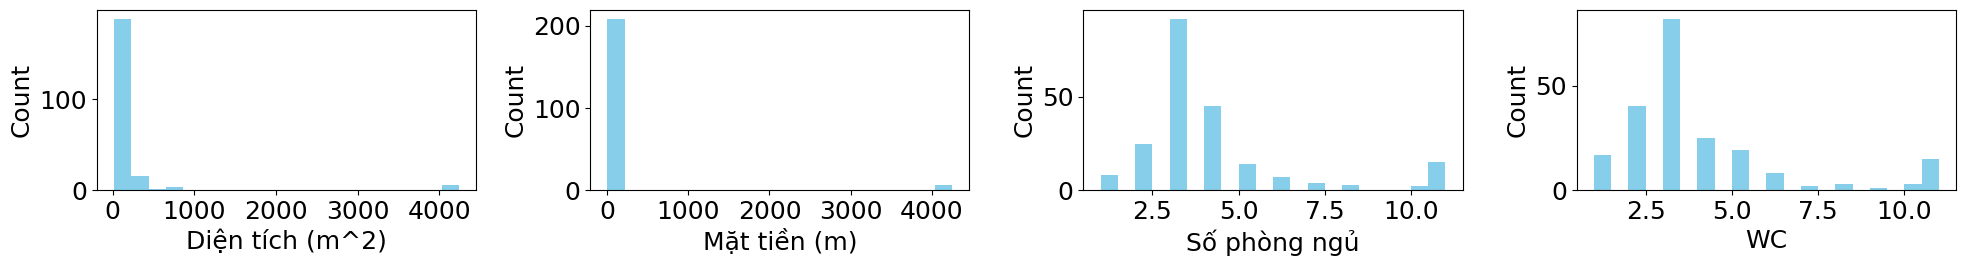

In [30]:
deal_colums = ['Diện tích (m^2)', 'Mặt tiền (m)', 'Số phòng ngủ', 'WC']
plt.figure(figsize=(20, 3))
j=1
for col in deal_colums:
        plt.subplot(1, len(deal_colums), j)
        plt.hist(df_no_null[col], bins=20, color='skyblue')
        plt.xlabel(col)
        plt.ylabel("Count")
        j+=1
plt.tight_layout()
plt.show()

GET RID OF OUTLIERS USING IQR

In [31]:
numeric_cols = df.select_dtypes(include='number').columns # get all features whose data is numeric

In [32]:
Q1 = df_no_null['Giá nhà (Tỷ)'].quantile(0.35) # calculate 1st quantile
Q3 = df_no_null['Giá nhà (Tỷ)'].quantile(0.65) # calculate 3rd quantile
IQR = Q3 - Q1 # calculate IQR
# Find lower_limit and upper_limit
lower_limit = Q1 - 3 * IQR
upper_limit = Q3 + 3 * IQR

# Filter out rows with 'Giá nhà (Tỷ)' values outside the lower_limit and upper_limit
filtered_df = df_no_null[(df_no_null['Giá nhà (Tỷ)'] >= lower_limit) & (df_no_null['Giá nhà (Tỷ)'] <= upper_limit)]
# This will create a new DataFrame 'filtered_df' that contains only the rows where 'Giá nhà (Tỷ)' values are within the defined limits.
filtered_df


,Diện tích (m^2),Khu vực,Mô tả vị trí,Mặt tiền (m),Số phòng ngủ,WC,Giá nhà (Tỷ)
0,46,Quận Sơn Trà,CĂN HỘ CHUNG CƯ,15,1.0,1.0,2.20
1,433,Quận Ngũ Hành Sơn,"NHÀ BIỆT THỰ, LIỀN KỀ",15,4.0,4.0,13.42
2,100,Quận Ngũ Hành Sơn,NHÀ ĐẤT THỔ CƯ,5,3.0,3.0,4.30
3,64,Quận Hải Châu,NHÀ MẶT PHỐ,6,3.0,3.0,9.90
4,180,Quận Sơn Trà,"NHÀ BIỆT THỰ, LIỀN KỀ",10,4.0,4.0,12.90
...,...,...,...,...,...,...,...
215,140,Quận Sơn Trà,NHÀ MẶT PHỐ,5,8.0,10.0,18.00
216,250,Quận Sơn Trà,"NHÀ BIỆT THỰ, LIỀN KỀ",10,4.0,6.0,22.00
217,87,Quận Sơn Trà,NHÀ MẶT PHỐ,4,4.0,2.0,5.00
218,140,Quận Hải Châu,NHÀ MẶT PHỐ,6,5.0,5.0,6.00


In [33]:
def change_outliers(data):
    for col in deal_colums:
        Q1 = data[col].quantile(0.25) # calculate 1st quantile
        Q3 = data[col].quantile(0.75) # calculate 3rd quantile
        IQR = Q3 - Q1 # calculate IQR
        # Find lower_limit and upper_limit
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        # Replace data out of limit with limit value
        data.loc[data[col] > upper_limit, col] = upper_limit 
        data.loc[data[col] < lower_limit, col] = lower_limit
    return data
df_no_outliers = change_outliers(filtered_df)

C:\Users\PhanHa\AppData\Local\Temp\ipykernel_8804\2271903306.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '199.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[col] > upper_limit, col] = upper_limit


HISTOGRAMS OF DATA BEFORE AND AFTER CLEANING

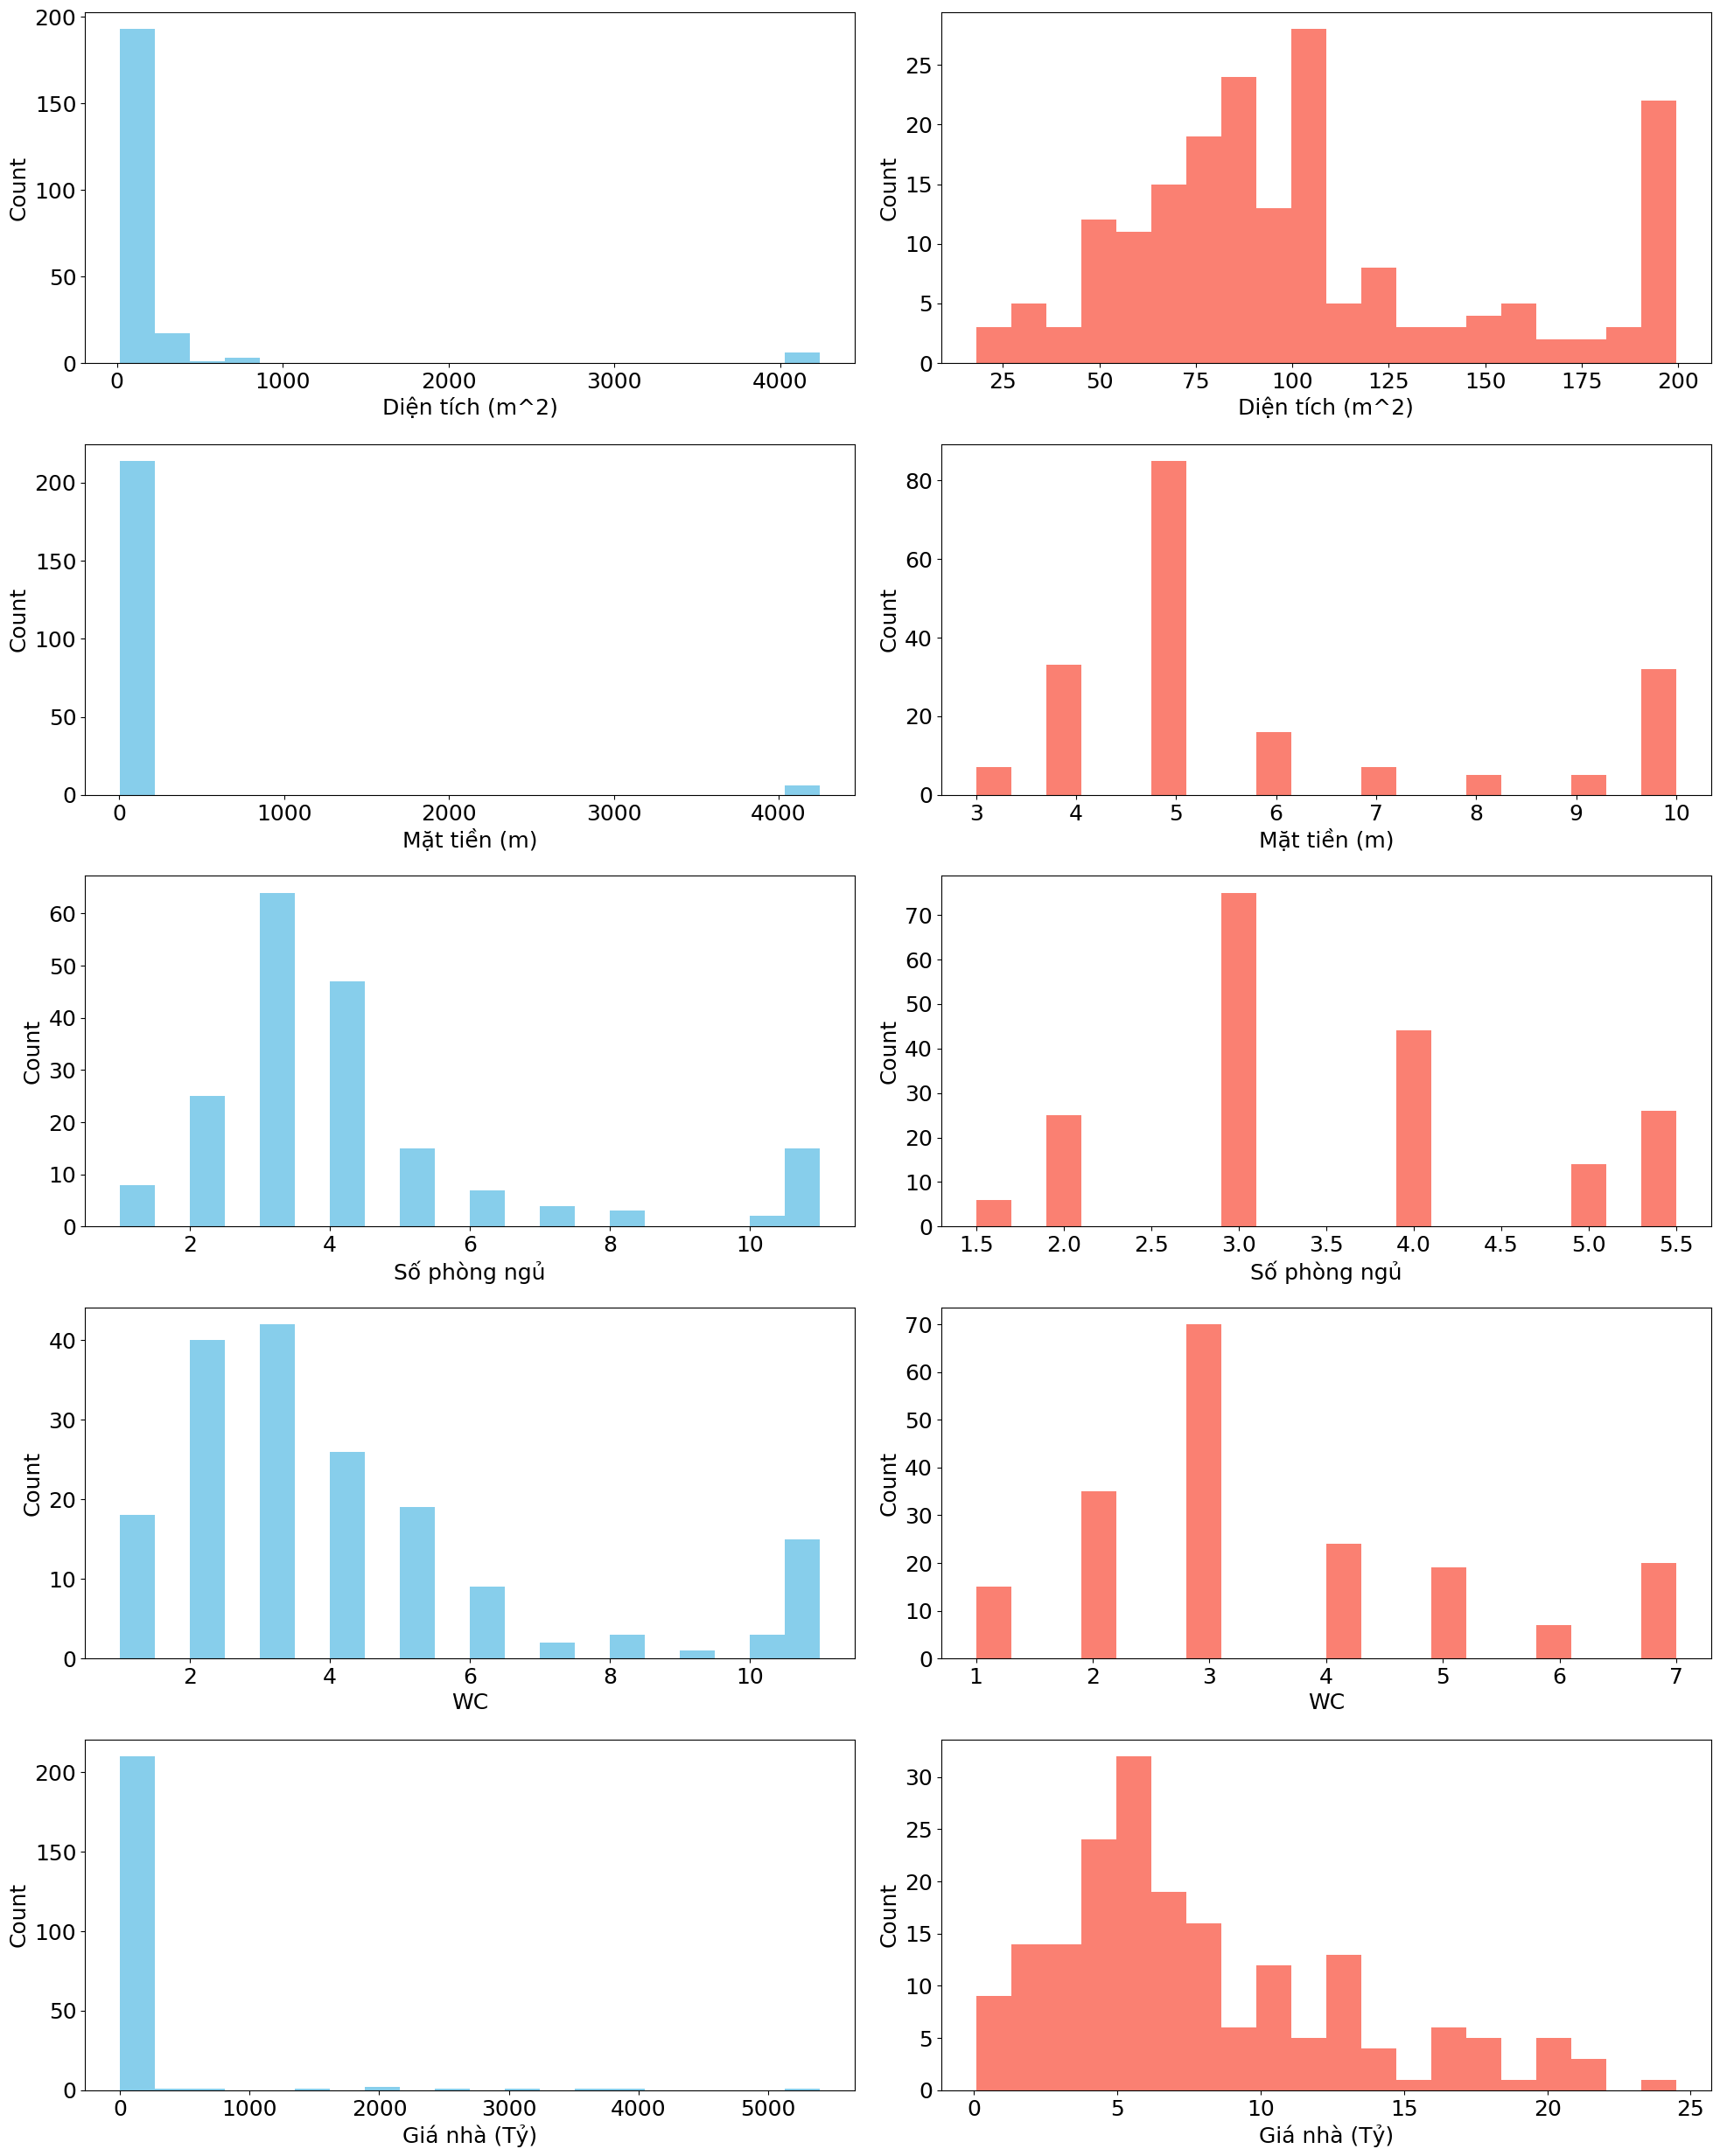

In [34]:
def histogram(df_before, df_after):
    plt.figure(figsize=(20, 25))
    j = 1
    for col in numeric_cols:
        plt.subplot(len(numeric_cols), 2, j)
        plt.hist(df_before[col], bins=20, color='skyblue')
        plt.xlabel(col)
        plt.ylabel("Count")

        plt.subplot(len(numeric_cols), 2, j+1)
        plt.hist(df_after[col], bins=20, color='salmon')
        plt.xlabel(col)
        plt.ylabel("Count")

        j += 2
    plt.tight_layout()
    plt.show()
histogram(df, df_no_outliers)

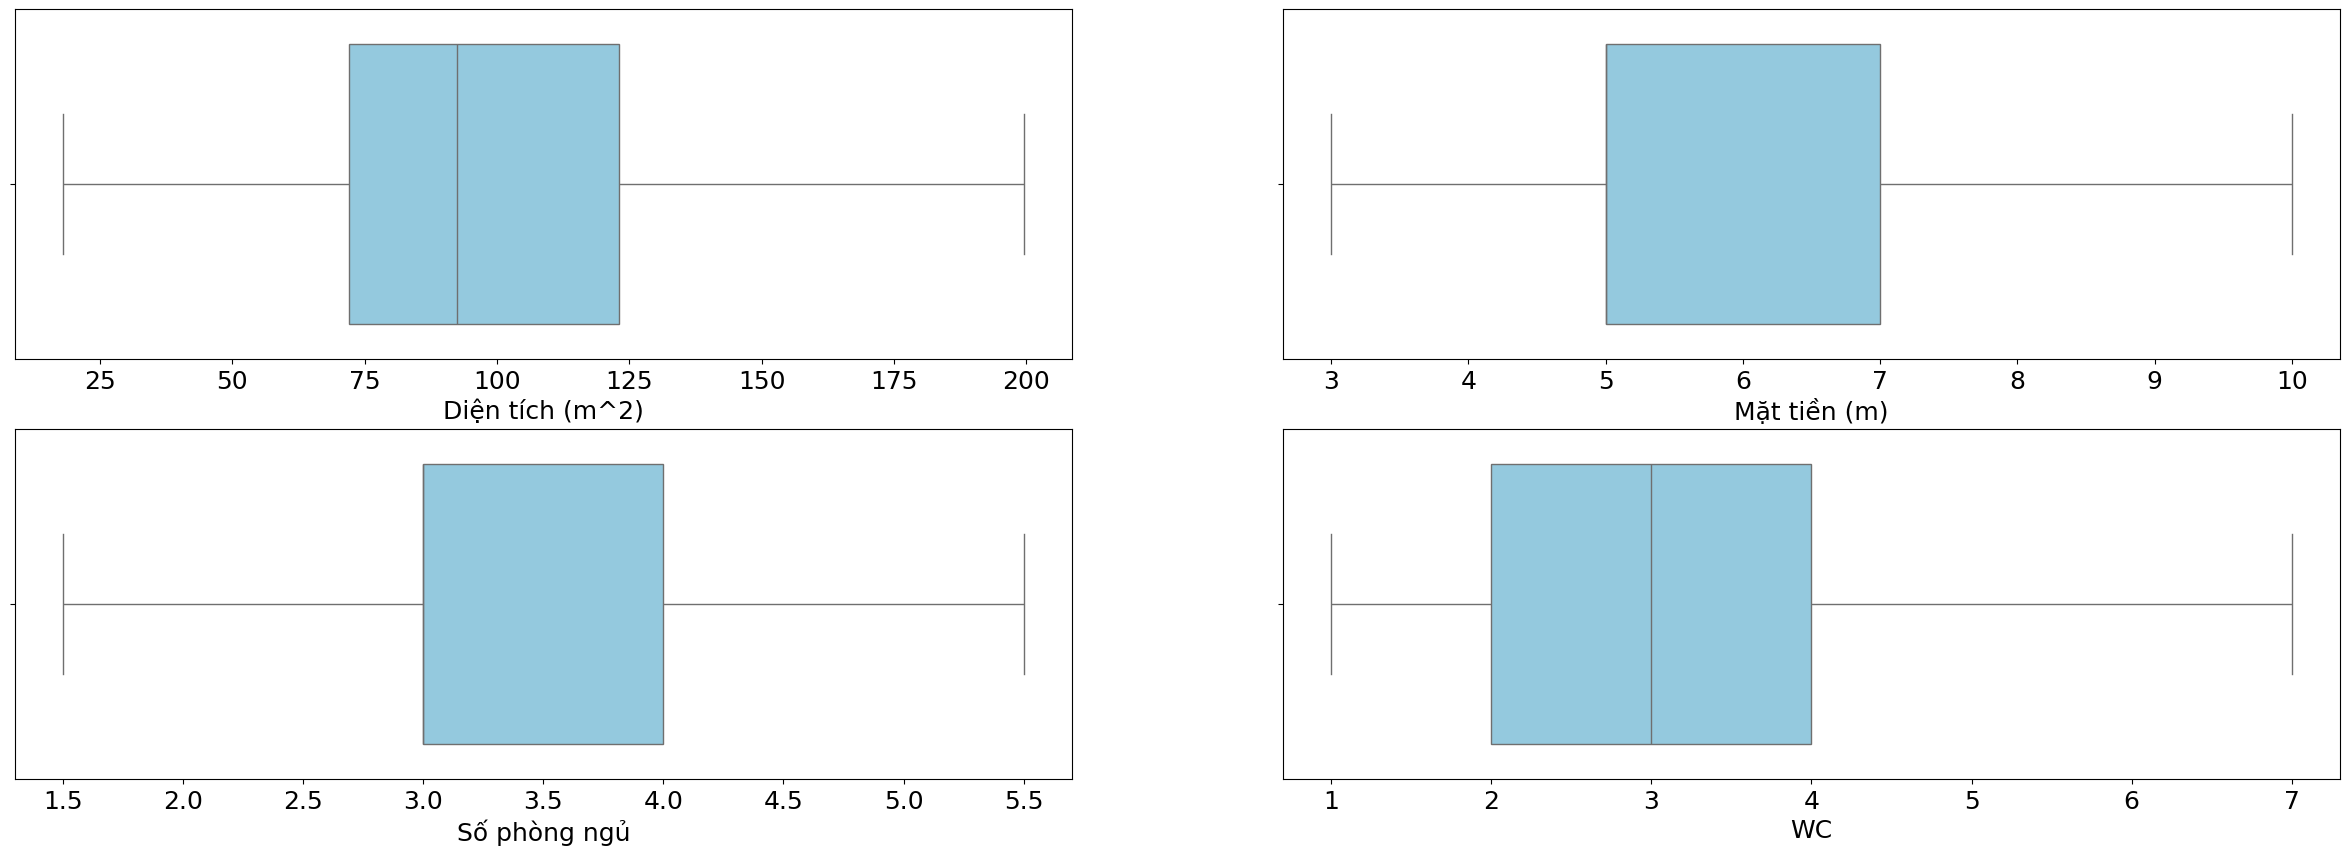

In [35]:
plt.figure(figsize=(30, 10))
j=1
for col in deal_colums:
    plt.subplot(2, 2, j)
    sns.boxplot(data=df_no_outliers, x=col, color='skyblue')
    plt.xlabel(col)
    j+=1
plt.show()

NORMALIZATION

In [36]:
df_to_norm = df_no_outliers[numeric_cols]

MIN-MAX NORMALIZATION

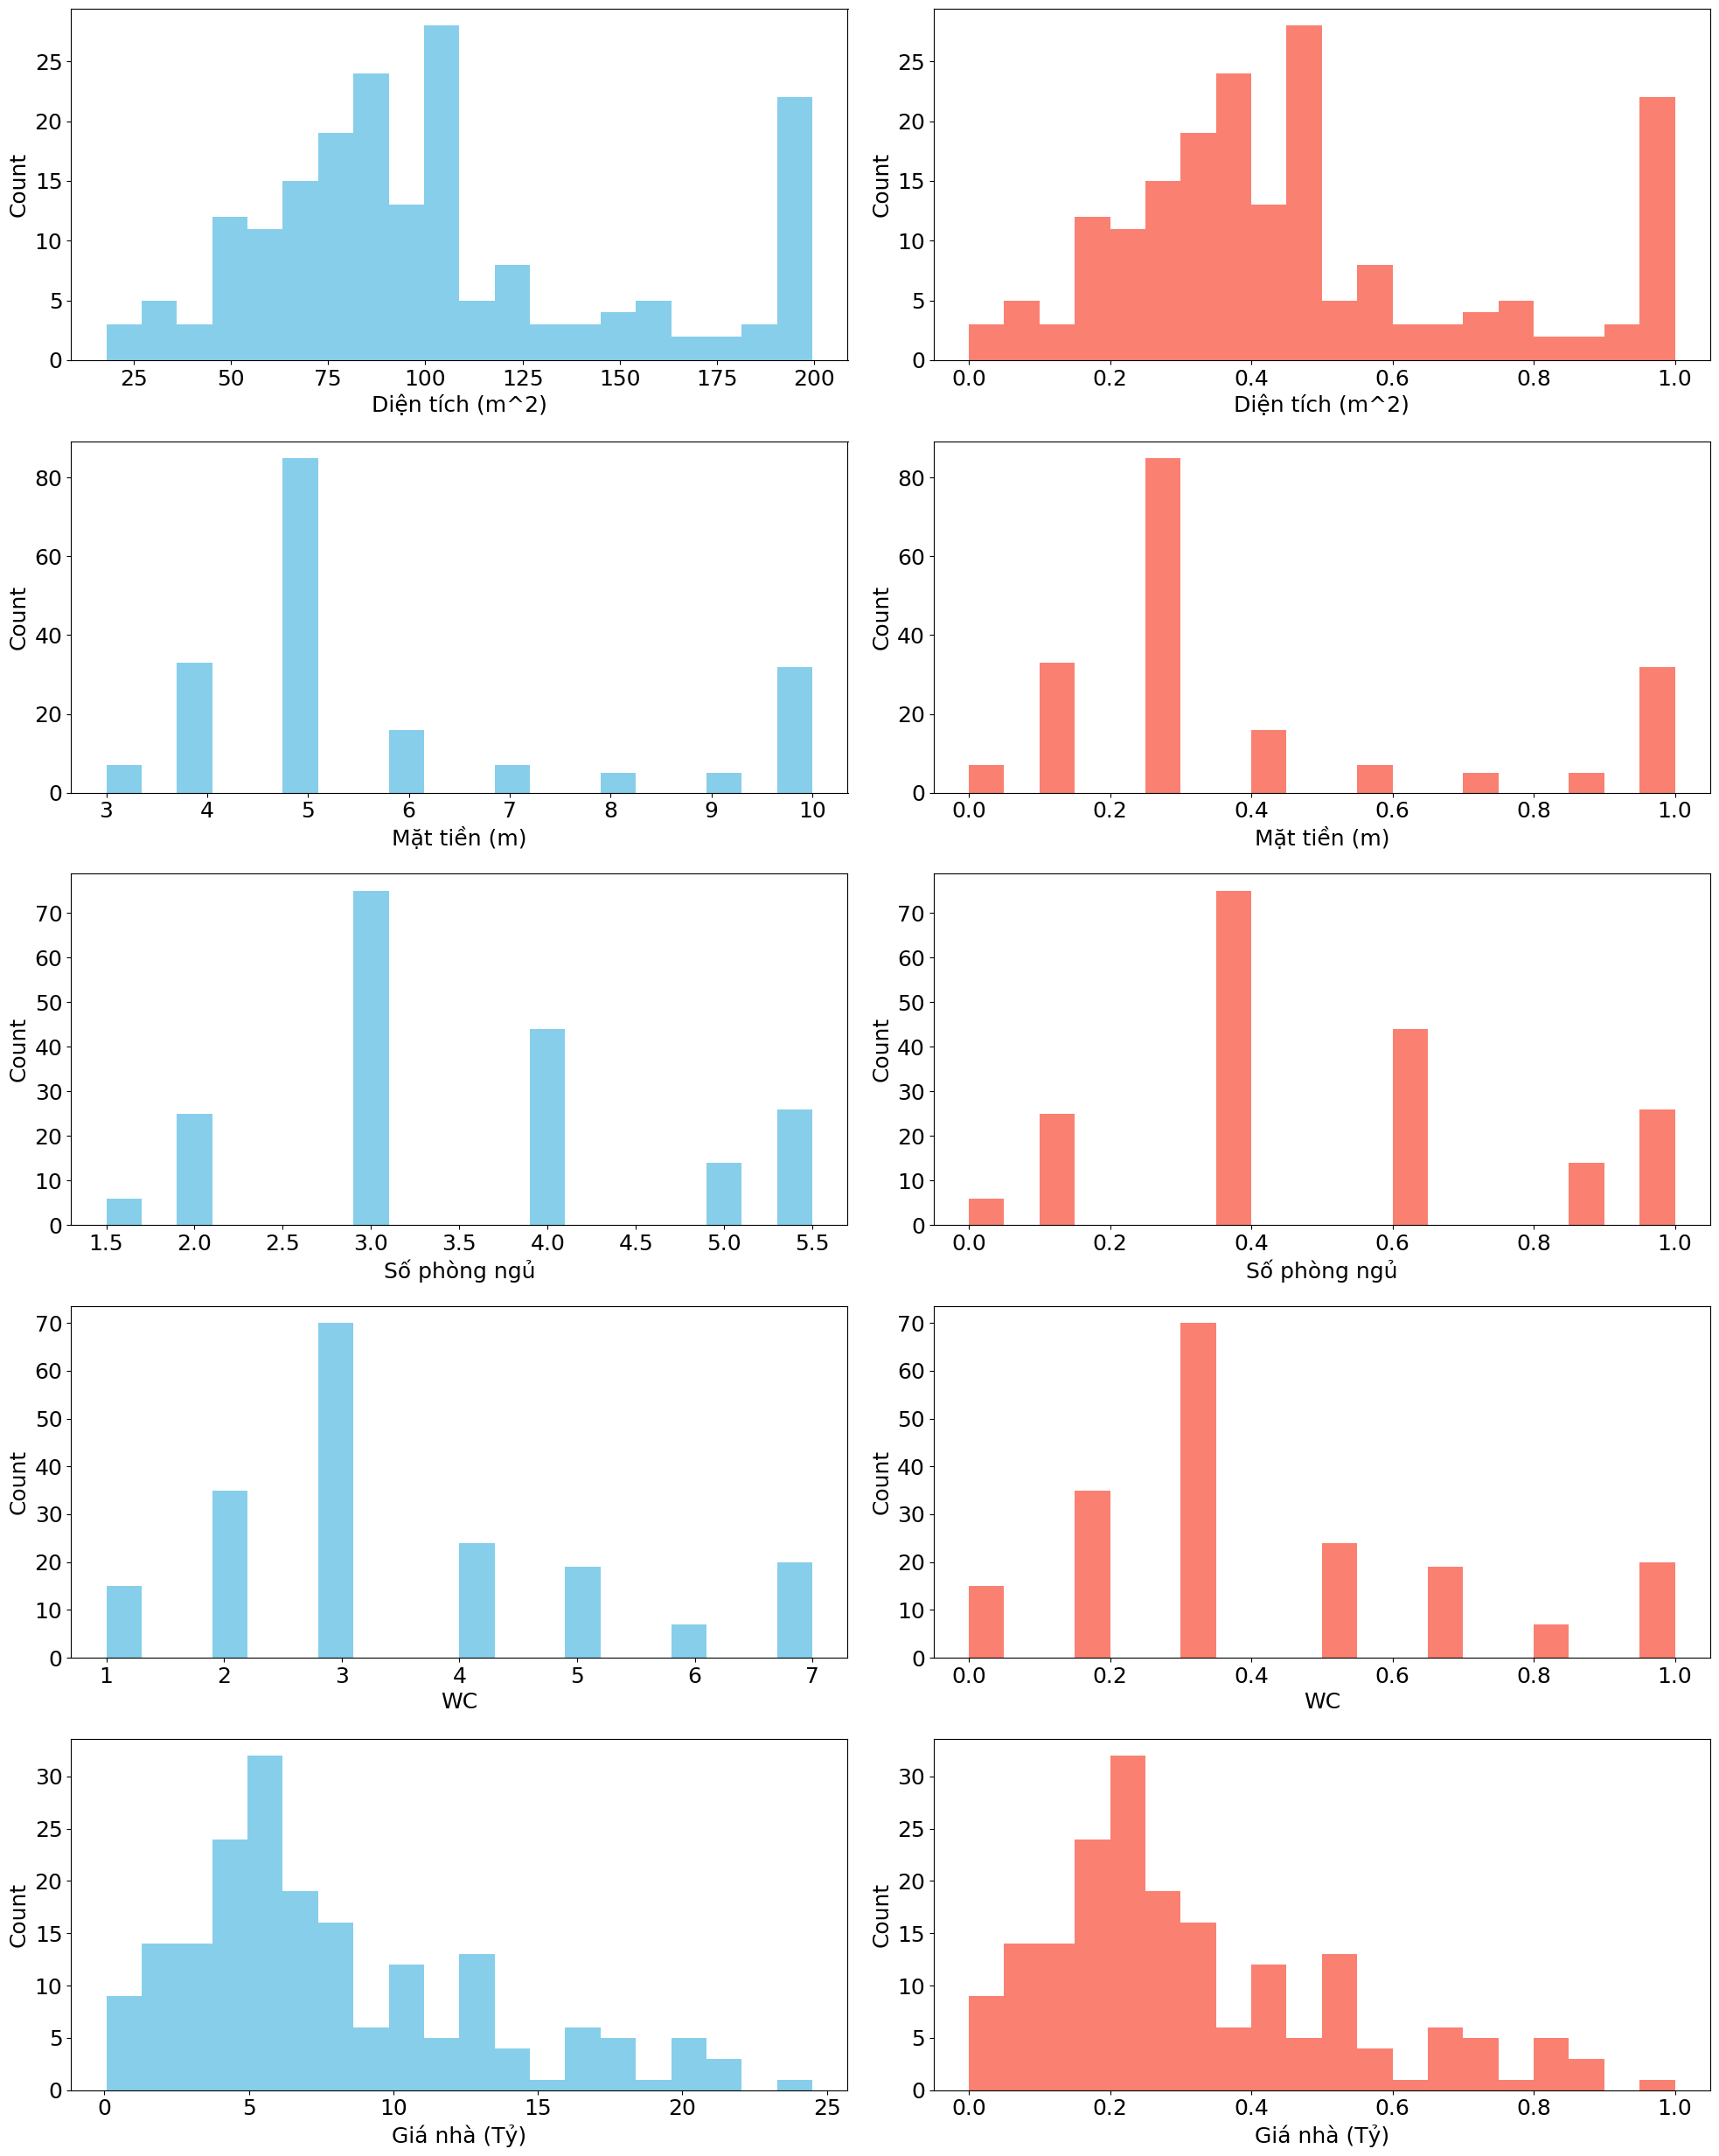

In [37]:
min_max = MinMaxScaler()
df_minmax = pd.DataFrame(min_max.fit_transform(df_to_norm), columns=df_to_norm.columns)
histogram(df_no_outliers, df_minmax)

POWERTRANSFORMER NORMALIZATION

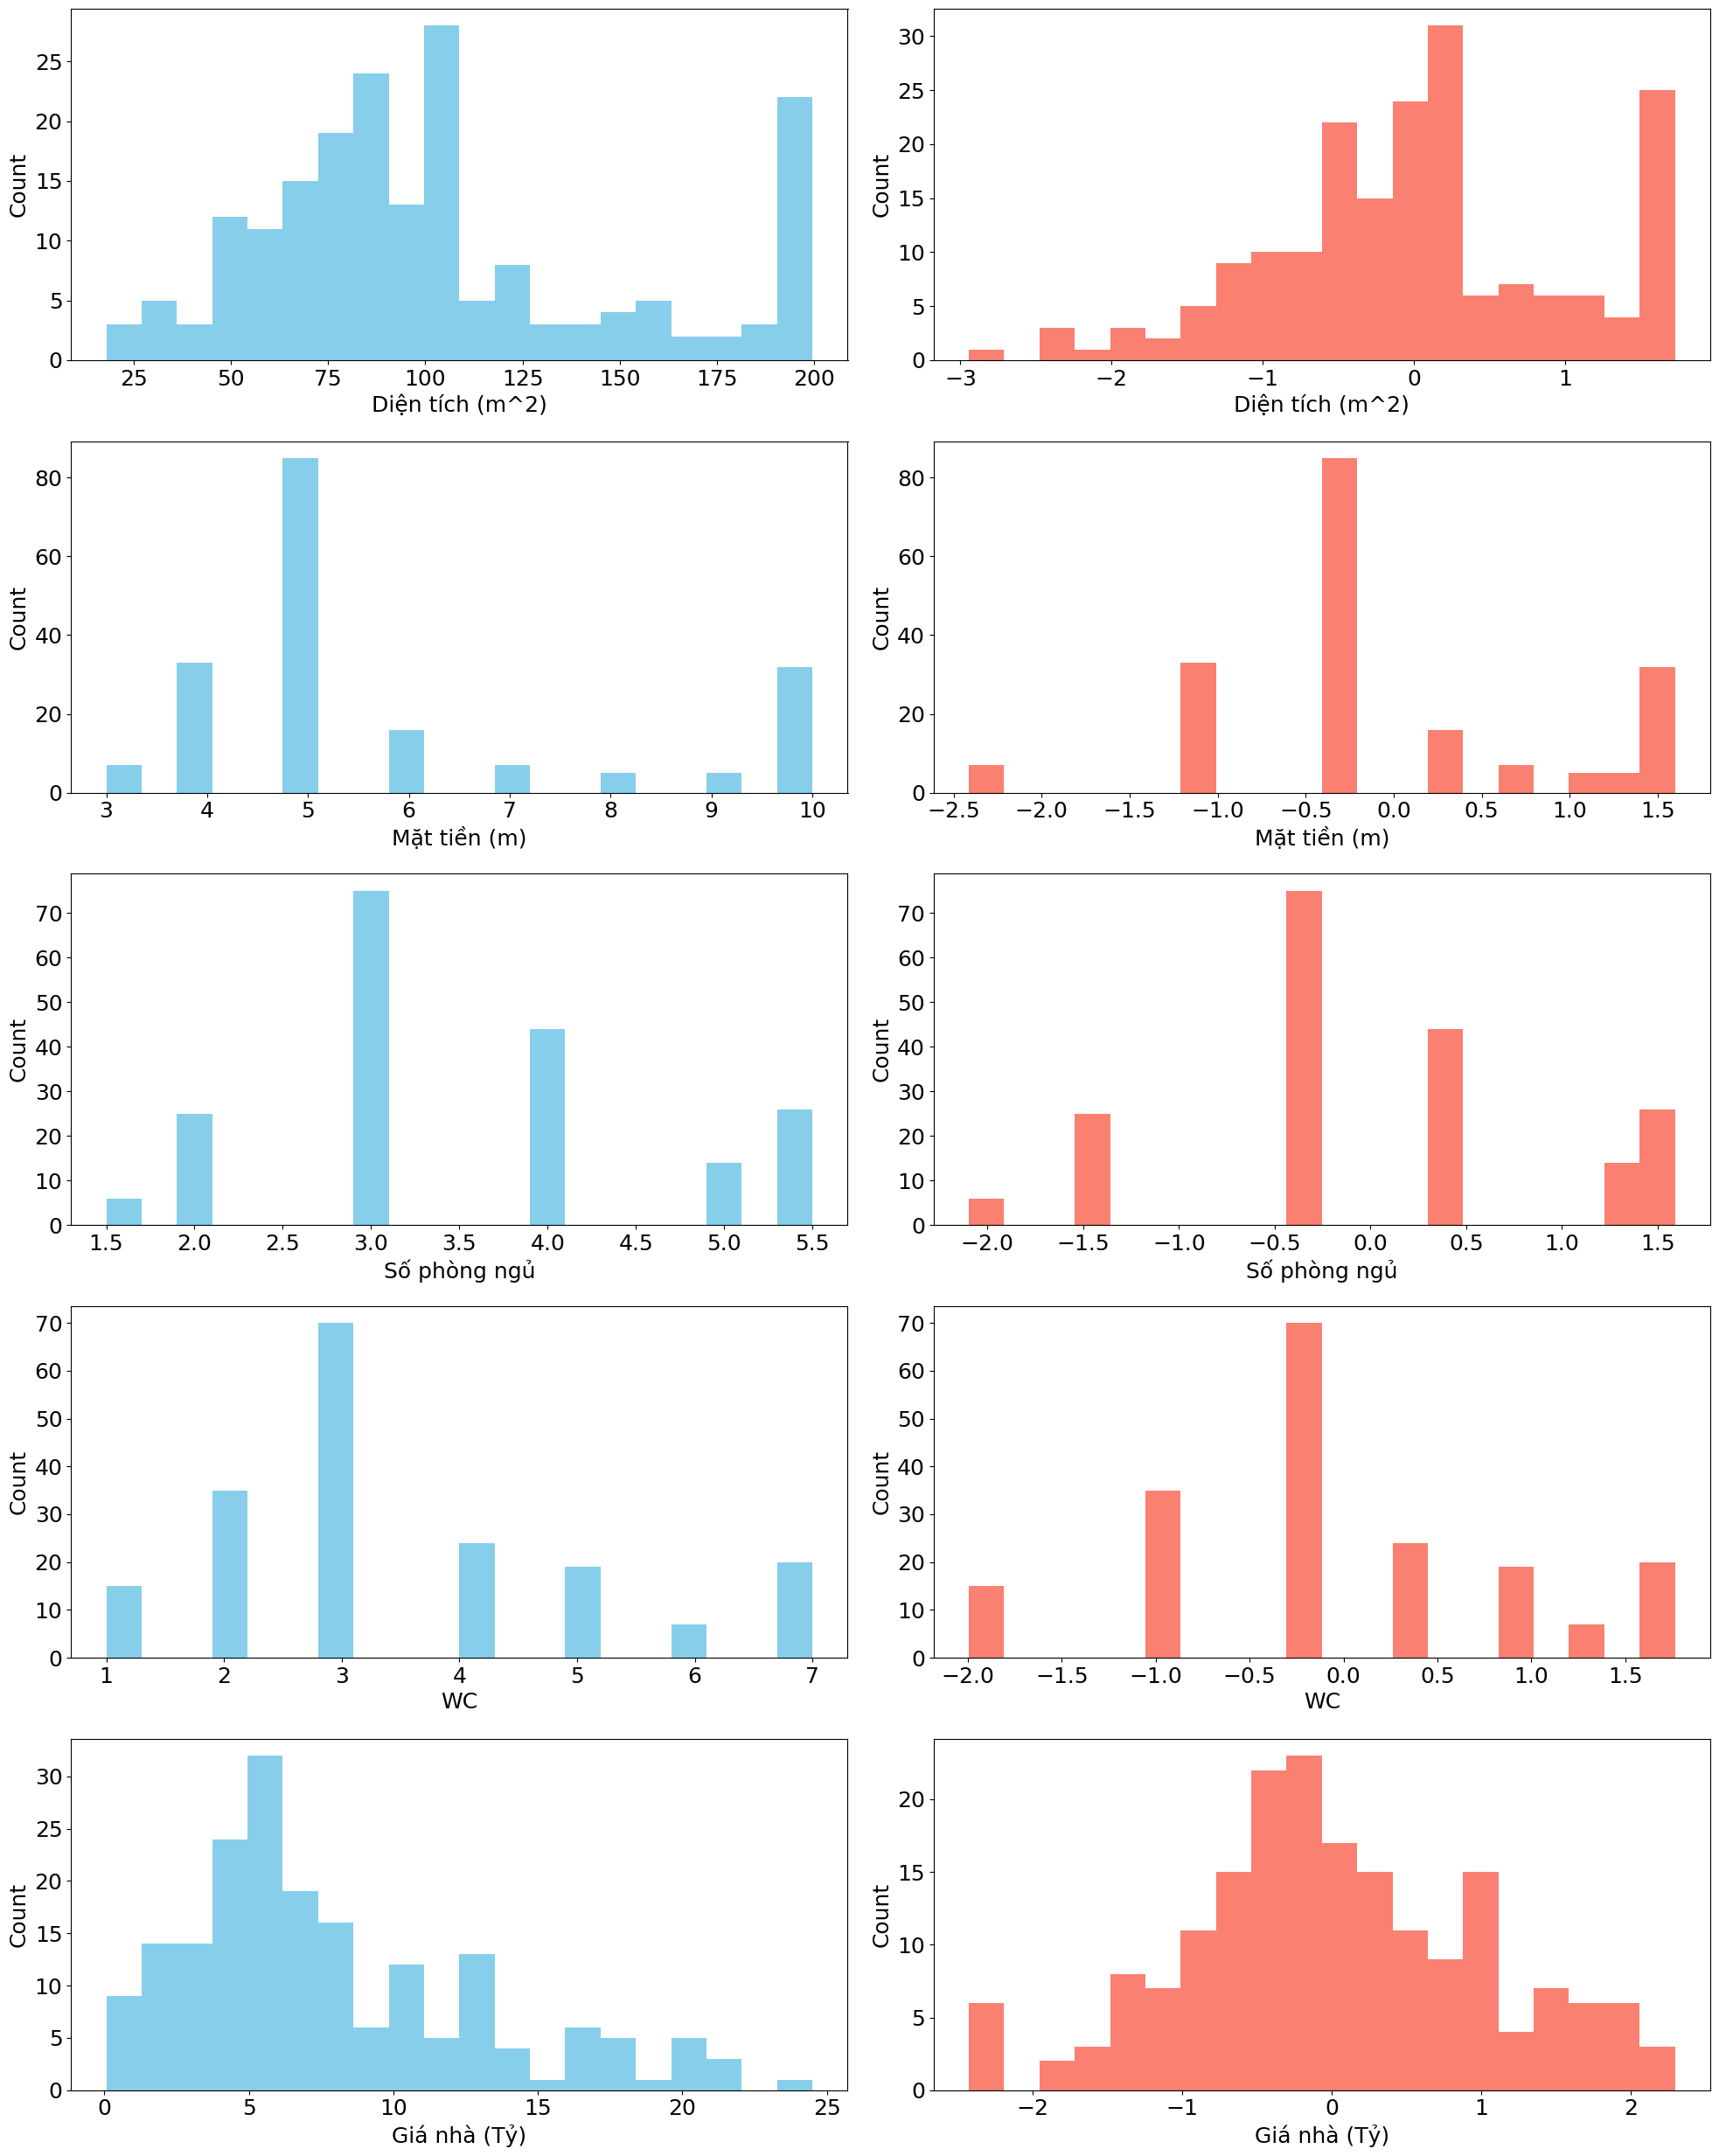

In [38]:
power = PowerTransformer()
df_power = pd.DataFrame(power.fit_transform(df_to_norm), columns=df_to_norm.columns)
histogram(df_no_outliers, df_power)

In [39]:
df_no_outliers.to_csv("clean_data_test.csv", index=False)